# **Project Name**    -

# **Coronavirus Tweet Sentiment Analysis**

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **A Project By -**   Vani Bhatt


# **Project Summary -**

Write the summary here within 500-600 words.

COVID-19 originally known as Corona VIrus Disease of 2019, has been declared as a pandemic by World Health Organization (WHO) on 11th March 2020. Unprecedented pressures have mounted on each country to make compelling requisites for controlling the population by assessing the cases and properly utilizing available resources. The rapid number of exponential cases globally has become the apprehension of panic, fear and anxiety among people. The mental and physical health of the global population is found to be directly proportional to this pandemic disease. It is the need of the hour to implement different measures to safeguard the countries by demystifying the pertinent facts and information.

Sentiment Analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic  is positive, negative, or neutral.

COVID-19 originally known as Coronavirus Disease of 2019, has been declared as a pandemic by World Health Organization (WHO) on 11th March 2020.

The study analyzes various types of tweets gathered during the pandemic times hence can be useful in policy making to safeguard the countries by demystifying the pertinent facts and information.


# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/vani4vani/CORONAVIRUS_TWEET_SENTIMENT_ANALYSIS_Capstone_Project.git

git@github.com:vani4vani/CORONAVIRUS_TWEET_SENTIMENT_ANALYSIS_Capstone_Project.git

# **Problem Statement**


**Write Problem Statement Here.**



### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

# Workflow



1.   Review Dataset
1.   Pre-Processing
1.   Tokenizing and Removing Stopwords
2.   Transformation
1.   Classification
2.   Evaluation






#**Index**

**1. Introduction**

**2. Lets Invite Some Libararies.**

**3. Exploratory Data Analysis./Reviwing Our Dataset**

**4. Data Preprocessing.**

*  Tokenization And Stopword Removal.

**5. Vectorization.**

**6. Classification- MULTICLASS AND BINARY.**

**7. Evaluation.**

**8. Challenges.**

**9. Conclusion.**


# **General Guidelines** : -


1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

# ***Let's Begin !***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install gensim

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import string
import nltk # for text manipulation
from nltk.stem.porter import *
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from tqdm import tqdm

import gensim
from gensim.models.doc2vec import TaggedDocument
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
working_dir_path = '/content/drive/MyDrive/AlmaBetter_assignments/Capstone Project - Coronavirus Tweet Sentiment Analysis/Coronavirus Tweets.csv'
df = pd.read_csv(working_dir_path,encoding = 'latin')

### Dataset First View

# **2. Reviewing Our Dataset/ Exploratory Data Analysis**

The original dataset has 6 columns and 41157 rows.

In order to analyse various sentiments, We require just two columns named Original Tweet and Sentiment.

There are four types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive.

The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.

All tweets data collected from the months of March and April 2020.
Bar plot shows us the number of unique values in each column.

There are 20.87%(8567) null values in various places of location column.
Most of the tweets came from London followed by U.S.

There are some words like ‘coronavirus’,’grocery store’, having the maximum frequency in our dataset.

There are various #hashtags in tweets column.But they are almost same in all sentiments.

Most of the peoples are having positive sentiments about various issues shows us their optimism during pandemic times.

Very few people are having extremely negatives thoughts about Covid-19.




In [ ]:
# Dataset First Look
df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0                                                                                          @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
1  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...   
2                                                                      Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P   
3  My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...   
4  Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...   

            Sentiment  
0             Neutral  
1            Positive  
2            Positive  
3            Positive  
4  Extremely Negative

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

# There 41157 rows and 6 columns in our database
df.shape

(41157, 6)

### Dataset Information

In [ ]:
# Dataset Info

# There are null values in location column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

df.duplicated().sum()


0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

In [ ]:
# Checking for null values in 'Sentiment' column

pd.isnull(df["Sentiment"])

0        False
1        False
2        False
3        False
4        False
         ...  
41152    False
41153    False
41154    False
41155    False
41156    False
Name: Sentiment, Length: 41157, dtype: bool

Only Location column contains 28% null values. But this column is not useful for our sentiment analysis.Hence we will neglect these null values.

In [ ]:
missing_values = pd.DataFrame()
missing_values['column'] = df.columns

missing_values['percent'] = [round(100* df[col].isnull().sum() / len(df), 2) for col in df.columns]
missing_values = missing_values.sort_values('percent')
missing_values = missing_values[missing_values['percent']>0]

In [ ]:
# Visualizing the missing values

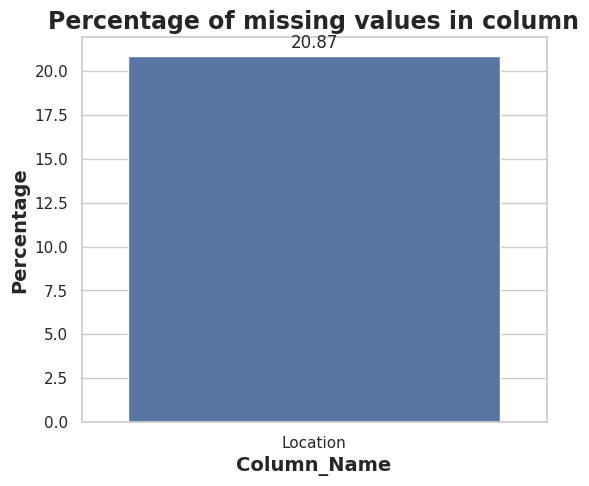

In [ ]:
# percentage of missing values in barplot of location column

plt.figure(figsize=(6, 5))
sns.set(style='whitegrid', color_codes=True)
splot=sns.barplot(x='column', y='percent', data=missing_values)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.ylabel("Percentage", size=14, weight="bold")
plt.title("Percentage of missing values in column",fontweight="bold",size=17)
plt.show()


#### Heat Map for missing values

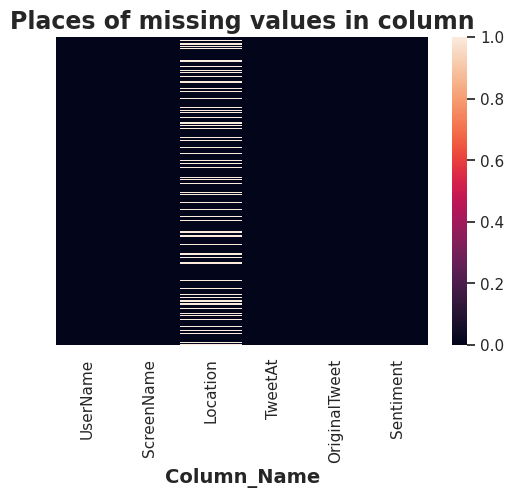

In [ ]:
# Heat map for missing values

plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

### What all manipulations have you done and insights you found?

Answer Here.

- No Duplicate values are found in the Dataset
- Missing values are only present in the location column and they are around 28%.
- As the location column is not useful for sentiment analysis, we can neglect these null values.


## ***2. Understanding Your Variables***

In [ ]:
# Names Of columns in our dataset

df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe()

UserName    ScreenName
count  41157.000000  41157.000000
mean   24377.000000  69329.000000
std    11881.146851  11881.146851
min     3799.000000  48751.000000
25%    14088.000000  59040.000000
50%    24377.000000  69329.000000
75%    34666.000000  79618.000000
max    44955.000000  89907.000000

### Variables Description

Answer Here


- Variables Description
  - OriginalTweet: This column contains the original tweet posted by the user.
  - Sentiment: This column contains the sentiment of the tweet. The sentiment can be one of the following values: Extremely Negative, Negative, Neutral, Positive, and Extremely Positive.
  - Location: This column contains the location of the user who posted the tweet.
  - UserName: This column contains the username of the user who posted the tweet.
  - ScreenName: This column contains the screen name of the user who posted the tweet.
  - TweetAt-TimeStamp: This column contains the time stamp of the tweet.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

In [ ]:
# All tweets came only from March and April month of 2020.

# Number tweets received in a day
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [ ]:
# There are total 12220 unique locations from where the tweets came.

df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [ ]:
# There are 5 unique sentiment types in our dataset

# Count of each of the 5 unique sentiments
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

### Understanding tweet and sentiment columns.

In [ ]:
# Dataset values where the 'Sentiment' column is 'Extremely Negative'

df[df['Sentiment']=='Extremely Negative']

UserName  ScreenName              Location     TweetAt  \
4          3803       48755                   NaN  16-03-2020   
20         3819       48771  southampton soxx xxx  16-03-2020   
27         3826       48778   Everywhere You Are!  16-03-2020   
29         3828       48780        Someplace, USA  16-03-2020   
42         3841       48793               Houston  16-03-2020   
...         ...         ...                   ...         ...   
41115     44914       89866                   NaN  14-04-2020   
41128     44927       89879  Melbourne, Australia  14-04-2020   
41130     44929       89881                   NaN  14-04-2020   
41133     44932       89884               Austria  14-04-2020   
41153     44952       89904                   NaN  14-04-2020   

                                                                                                                                                                                                 OriginalTweet  \
4      Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...   
20     with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty...   
27     This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus.  Stay home people and be pragmat...   
29     @7SealsOfTheEnd Soon with dwindling supplies unlawful Panicky people will be breaking into Closed Stores &amp; Supermarkets to Raid them as they normally do during a Crisis so massive as the #Coro...   
42     CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No food ? in USA market due to coronavirus panic we gonna die from starvation #CoronavirusOutbreak #coronavirus #houston #nofood #Notoiletpaper #NoHandShak...   
...                                                                                                                                                                                                        ...   
41115  Food Banks are not equipped for a 30% unemployment rate. The federal government must provide direct aid to everyone, very quickly.\r\r\n\r\r\n"The Coronavirus Food Bank Crisis Is Already Underway"...   
41128  The COVID-19 pandemic and global oil price wars are having an economic impact worldwide, but one consequence is lower fuel prices at Australian petrol pumps for the foreseeable.\r\r\n\r\r\n#UniMel...   
41130  Squeo works in the meat department of a Kroger supermarket in Michigan. He knows of several grocery workers whoÂve tested positive for COVID-19 and one in his area who died. He worries that the b...   
41133  A Singaporean politician who slammed a woman snapped with seven supermarket trolleys during COVID-19 lockdown has been forced to eat humble pie after it turned out she was donating goods to the po...   
41153                                                               Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?   

                Sentiment  
4      Extremely Negative  
20     Extremely Negative  
27     Extremely Negative  
29     Extremely Negative  
42     Extremely Negative  
...                   ...  
41115  Extremely Negative  
41128  Extremely Negative  
41130  Extremely Negative  
41133  Extremely Negative  
41153  Extremely Negative  

[5481 rows x 6 columns]

In [ ]:
# Dataset values where the 'Sentiment' column is 'Extremely Negative' and slicing the 20th row

df[df['Sentiment']=='Extremely Negative'].loc[20,'OriginalTweet']

'with 100  nations inficted with  covid  19  the world must  not  play fair with china  100 goverments must demand  china  adopts new guilde  lines on food safty  the  chinese  goverment  is guilty of  being  irosponcible   with life  on a global scale'

In [ ]:
# Dataset values where the 'Sentiment' column is 'Extremely Negative' and slicing the 41153th row

df[df['Sentiment']=='Extremely Negative'].loc[41153,'OriginalTweet']

'Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?'

In [ ]:
# Dataset values where the 'Sentiment' column is 'Negative'

df[df['Sentiment']=='Negative']

UserName  ScreenName                      Location     TweetAt  \
9          3808       48760              BHAVNAGAR,GUJRAT  16-03-2020   
24         3823       48775              Downstage centre  16-03-2020   
26         3825       48777                Ketchum, Idaho  16-03-2020   
28         3827       48779                  New York, NY  16-03-2020   
30         3829       48781                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41127     44926       89878                           NaN  14-04-2020   
41131     44930       89882                  Accra, Ghana  14-04-2020   
41147     44946       89898                  Brooklyn, NY  14-04-2020   
41149     44948       89900              Toronto, Ontario  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                                                                                                                                                                                 OriginalTweet  \
9      For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our h...   
24     @10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checko...   
26     In preparation for higher demand and a potential food shortage, The Hunger Coalition purchased 10 percent more food and implemented new protocols due to the COVID-19 coronavirus. https://t.co/5Cec...   
28     Do you see malicious price increases in NYC? The NYC Department of Consumer and Worker Protection (DCWP) has set up a page to digitally file a complaint. Click here: https://t.co/oEx6Y8mm2K\r\r\n\...   
30                                                                                          There Is of in the Country  The more empty shelves people see the more buying ensues the more food is out of stock   
...                                                                                                                                                                                                        ...   
41127  Today at the grocery store I saw someone getting a case of #Corona beer and I was about to jokingly say 'hey man i see you got Corona' then I stopped myself doing that thinking it would be the new...   
41131  In every human affliction there are  gainers and losers. In this case of Covid 19, the TELECOS are gaining beyond expectations. The level of internet being used at this moment is mind blowing. Gov...   
41147                                                                                                                       YÂall really shitting that much more at home?? #COVID19 #coronavirus #toiletpaper   
41149                        Still shocked by the number of #Toronto supermarket employees working without some sort of mask. We all know by now, employees can be asymptomatic while spreading #coronavirus .   
41156  @TartiiCat Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was announc...   

      Sentiment  
9      Negative  
24     Negative  
26     Negative  
28     Negative  
30     Negative  
...         ...  
41127  Negative  
41131  Negative  
41147  Negative  
41149  Negative  
41156  Negative  

[9917 rows x 6 columns]

In [ ]:
# Dataset values where the 'Sentiment' column is 'Negative' and slicing the 41149 row

df[df['Sentiment']=='Negative'].loc[41149,'OriginalTweet']

'Still shocked by the number of #Toronto supermarket employees working without some sort of mask. We all know by now, employees can be asymptomatic while spreading #coronavirus .'

In [ ]:
# Dataset values where the 'Sentiment' column is 'Neutral'

df[df['Sentiment']=='Neutral']

UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
7          3806       48758                       Austria  16-03-2020   
10         3809       48761                Makati, Manila  16-03-2020   
16         3815       48767                  Saudi Arabia  16-03-2020   
17         3816       48768               Ontario, Canada  16-03-2020   
...         ...         ...                           ...         ...   
41141     44940       89892                         India  14-04-2020   
41143     44942       89894              In burning hell.  14-04-2020   
41144     44943       89895                           NaN  14-04-2020   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   

                                                                                                                                                                                                 OriginalTweet  \
0                                                                                              @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
7                                                                                Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ   
10     All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a singl...   
16     ????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https:...   
17     @eyeonthearctic 16MAR20 Russia consumer surveillance watchdog reported case in high Arctic where a man who traveled to Iran has COVID-19 and 101 are "observed"\r\r\nhttps://t.co/4WnrrK9oKC https:/...   
...                                                                                                                                                                                                        ...   
41141  #Coronavirus ?? ????? ??? ????? ?? ??? ??????? ?? ????? ???? ?? ?? ??? ??? ?? ??? ?? ??????? ???? ??? ???????????? @narendramodi ?? ??? ????? ?? ????? ???? ?? ????\r\r\n#ATCard #StayHome #Lockdown...   
41143  https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUnido #cruiseships #SaveTheChildren #wuhan #BillGates?#SocialDistance #coronavirus is caused by #cellpoisoning from #radiation #cancer #exosomes #youcan...   
41144                                                                                                    @_Sunrise_SV @Gamzap @NPR What does not having a supermarket nearby have to do with getting COVID-19?   
41152                                                                                                   Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp   
41155                                                                                    Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus   

      Sentiment  
0       Neutral  
7       Neutral  
10      Neutral  
16      Neutral  
17      Neutral  
...         ...  
41141   Neutral  
41143   Neutral  
41144   Neutral  
41152   Neutral  
41155   Neutral  

[7713 rows x 6 columns]

In [ ]:
# Dataset values where the 'Sentiment' column is 'Neutral' and slicing the 17 row

df[df['Sentiment']=='Neutral'].loc[17,'OriginalTweet']

'@eyeonthearctic 16MAR20 Russia consumer surveillance watchdog reported case in high Arctic where a man who traveled to Iran has COVID-19 and 101 are "observed"\r\r\nhttps://t.co/4WnrrK9oKC https://t.co/ld05k5Eyns'

In [ ]:
# Dataset values where the 'Sentiment' column is 'Neutral' and slicing the 16th row

df[df['Sentiment']=='Neutral'].loc[16,'OriginalTweet']

'????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https://t.co/51bL8P6vZh'

In [ ]:
# Dataset values where the 'Sentiment' column is 'Positive'

df[df['Sentiment']=='Positive']

UserName  ScreenName                   Location     TweetAt  \
1          3800       48752                         UK  16-03-2020   
2          3801       48753                  Vagabonds  16-03-2020   
3          3802       48754                        NaN  16-03-2020   
5          3804       48756  ÃT: 36.319708,-82.363649  16-03-2020   
6          3805       48757       35.926541,-78.753267  16-03-2020   
...         ...         ...                        ...         ...   
41140     44939       89891                   Pakistan  14-04-2020   
41145     44944       89896              Manhattan, NY  14-04-2020   
41146     44945       89897             Gurgaon, India  14-04-2020   
41150     44949       89901                       OHIO  14-04-2020   
41154     44953       89905                        NaN  14-04-2020   

                                                                                                                                                                                                 OriginalTweet  \
1      advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...   
2                                                                          Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P   
3      My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...   
5      As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and ot...   
6                         Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented "I'm in Civics class so I know what I'm talking about". https://t.co/ieFDNeHgDO   
...                                                                                                                                                                                                        ...   
41140  Good News! \r\r\nWe'll Soon Announce Our High Tech G&amp;G Online &amp; Live Course for Covid-19 effected Countries in very low prices. \r\r\nTitle: How to Approach Shale Reservoirs\r\r\nSpeaker: ...   
41145                                                                                                How exactly are we going to re-open New York City if we still can't buy any hand sanitizer?  #coronavirus   
41146  #Gold prices rose to a more than 7-year high today due to #coronavirus increased bullion's #safe-haven appeal.\r\r\nIt gained 0.1% to $1,715.25/ounce , having touched its highest since Dec. 2012 a...   
41150  I never that weÂd be in a situation &amp; world that going to the supermarket , picking up a package or my mail is like playing Russian roulette with my life #coronavirus #StayHome #SocialDistancing   
41154                                                                 You know itÂs getting tough when @KameronWilds  is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!   

      Sentiment  
1      Positive  
2      Positive  
3      Positive  
5      Positive  
6      Positive  
...         ...  
41140  Positive  
41145  Positive  
41146  Positive  
41150  Positive  
41154  Positive  

[11422 rows x 6 columns]

In [ ]:
# Dataset values where the 'Sentiment' column is 'Positive' and slicing the 1 row

df[df['Sentiment']=='Positive'].loc[1,'OriginalTweet']

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [ ]:
# Dataset values where the 'Sentiment' column is 'Positive' and slicing the 6 row

df[df['Sentiment']=='Positive'].loc[6,'OriginalTweet']

'Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented "I\'m in Civics class so I know what I\'m talking about". https://t.co/ieFDNeHgDO'

In [ ]:
# Dataset values where the 'Sentiment' column is 'Extremely Positive'

df[df['Sentiment']=='Extremely Positive']

UserName  ScreenName                   Location     TweetAt  \
11         3810       48762  Pitt Meadows, BC, Canada   16-03-2020   
12         3811       48763                 Horningsea  16-03-2020   
18         3817       48769              North America  16-03-2020   
22         3821       48773                        NaN  16-03-2020   
23         3822       48774                        NaN  16-03-2020   
...         ...         ...                        ...         ...   
41137     44936       89888                   LES, NYC  14-04-2020   
41138     44937       89889            Los Angeles, CA  14-04-2020   
41142     44941       89893           Juba south sudan  14-04-2020   
41148     44947       89899                        NaN  14-04-2020   
41151     44950       89902                        NaN  14-04-2020   

                                                                                                                                                                                                 OriginalTweet  \
11     Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\...   
12     #horningsea is a caring community. LetÂs ALL look after the less capable in our village and ensure they stay healthy. Bringing shopping to their doors, help with online shopping and self isolatio...   
18     Amazon Glitch Stymies Whole Foods, Fresh Grocery Deliveries\r\r\nÂAs COVID-19 has spread, weÂve seen a significant increase in people shopping online for groceries,Â a spokeswoman said in a sta...   
22     We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???\r\r\n#Trials\r\r\n#Monthly\r\r\n#Yearly \r\r\nAnd Resonable #Prices / #Subscriptions\r\r\nJust DM US! #bestiptv #iptv #Servi...   
23     We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???\r\r\n#Trials\r\r\n#Monthly\r\r\n#Yearly \r\r\nAnd Resonable #Prices / #Subscriptions\r\r\nJust DM US! #bestiptv #iptv #Servi...   
...                                                                                                                                                                                                        ...   
41137                                                                                                      Distilleries have switched portions of their production from alcohol to hand sanitizer to help with   
41138                    HMU FOR PRICES!! Got great deals going right now. #weedsmokers #StonerFam #420 #bud #Gas #FullSend  #Nelkboys #coronavirus #StimulusChecks #ListenToYourHeart https://t.co/mDMgkOQ8m3   
41142                                                  @MajangChien @MTNSSD @MTNSSD is worst than COVID-19. All businesses have reduced their prices but our MTN is looting us instead of giving us free data.   
41148                  UV light Sterilizer Sanitizer for your mask and mobile phone ?, pls take care, be safe. #sanitizer #sanitizers #corona #coronavirus #coronavÃ­rus #coronavirÃ¼s https://t.co/v8XDXhqeYN   
41151  @MrSilverScott you are definitely my man. I feel like this fall when we are out and about again, we need to honor our heroes from COVID-19. You know who they are Â our healthcare people , grocery...   

                Sentiment  
11     Extremely Positive  
12     Extremely Positive  
18     Extremely Positive  
22     Extremely Positive  
23     Extremely Positive  
...                   ...  
41137  Extremely Positive  
41138  Extremely Positive  
41142  Extremely Positive  
41148  Extremely Positive  
41151  Extremely Positive  

[6624 rows x 6 columns]

In [ ]:
# Dataset values where the 'Sentiment' column is 'Extremely Positive' and slicing the 11 row

df[df['Sentiment']=='Extremely Positive'].loc[11,'OriginalTweet']

'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'

In [ ]:
# Dataset values where the 'Sentiment' column is 'Extremely Positive' and slicing the 22 row

df[df['Sentiment']=='Extremely Positive'].loc[22,'OriginalTweet']

'We have AMAZING CHEAP DEALS! FOR THE #COVID2019 going on to help you???\r\r\n#Trials\r\r\n#Monthly\r\r\n#Yearly \r\r\nAnd Resonable #Prices / #Subscriptions\r\r\nJust DM US! #bestiptv #iptv #Service #Iptv #iptvdeals #Cheap #ipTV #Football #HD #Movies #Adult #Cinema #hotmovies #iptvnew #iptv2020 #Adult'

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

Insights found till now:
- No Duplicate values are found in the Dataset
- Missing values are only present in the location column and they are around 28%.
- As the location column is not useful for sentiment analysis, we can neglect these null values.
- All tweets came only from March and April month of 2020.
- There are 12220 unique locations from where the tweets came.
- There are 5 unique sentiment types in our dataset.
- The most common sentiment is Neutral, followed by Positive, Negative, Extremely Positive, and Extremely Negative.
- The majority of tweets are from the London and United States


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

## Unique Values In Each Feature Coulmn

In [ ]:
# Chart - 1 visualization code

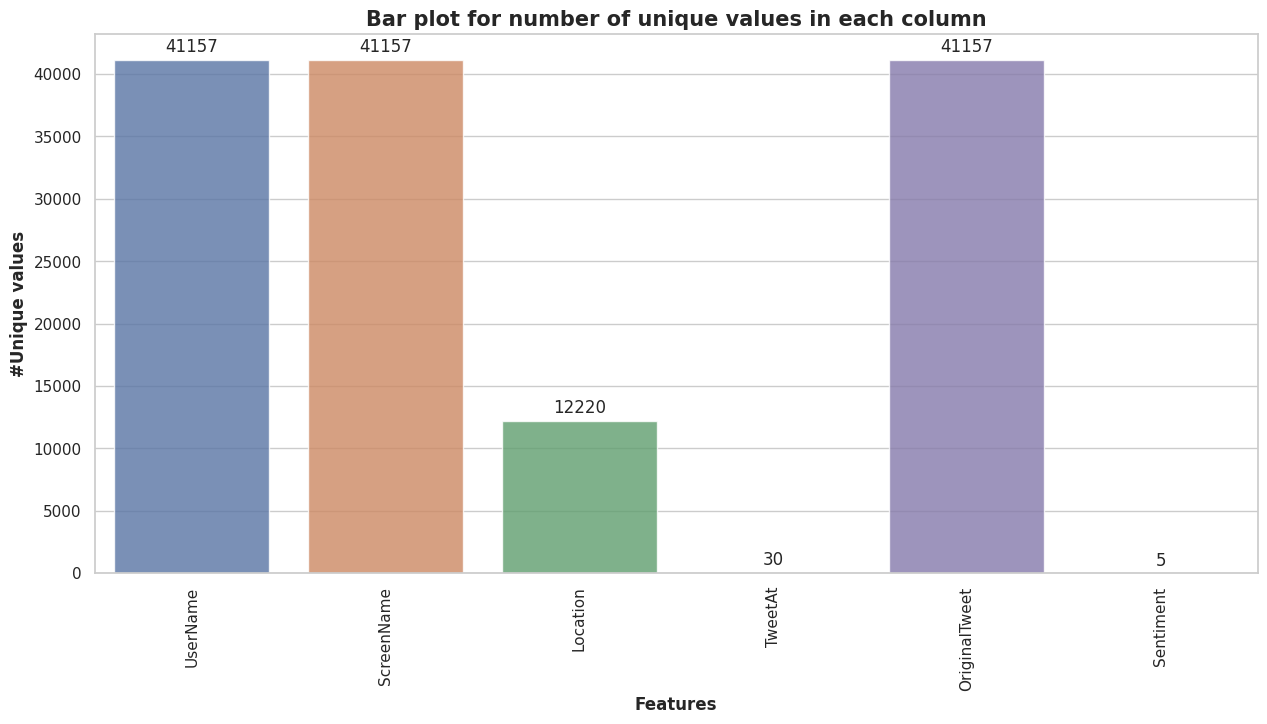

In [ ]:
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

- The bar chart is a good choice for visualizing the number of unique values in each column of the data frame.
- It is a simple and straightforward chart that allows us to easily see which columns have the most and least unique values.
- This information can be useful for understanding the distribution of the data and for identifying potential outliers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here



- The column with the most unique values is 'OriginalTweet', which is not surprising since each tweet is unique.
- The column with the second most unique values is 'UserName', which is also not surprising since each user has a unique username.
- The column with the third most unique values is 'Sentiment', which is interesting since there are only five possible values for this column. This suggests that the sentiment of tweets is not evenly distributed.
- The column with the least unique values is 'Location', which is also not surprising since there are only 12220 unique locations in the dataset.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

 The study can be helpful for different stakeholders.

For example, Government can make use of this information in policymaking as they can able to know how people are reacting to this new strain, what all challenges they are facing such as food scarcity, panic attacks, etc. Various profit organizations can make a profit by analyzing various sentiments as one of the tweets telling us about the scarcity of masks and toilet papers. These organizations can able to start the production of essential items thereby can make profits. Various NGOs can decide their strategy of how to rehabilitate people by using pertinent facts and information.

#### Chart - 2

## Plot Of Top 15 Locations Of Tweet.

In [ ]:
top_locations = df['Location'].value_counts().nlargest(15)
top_locations

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Name: Location, dtype: int64

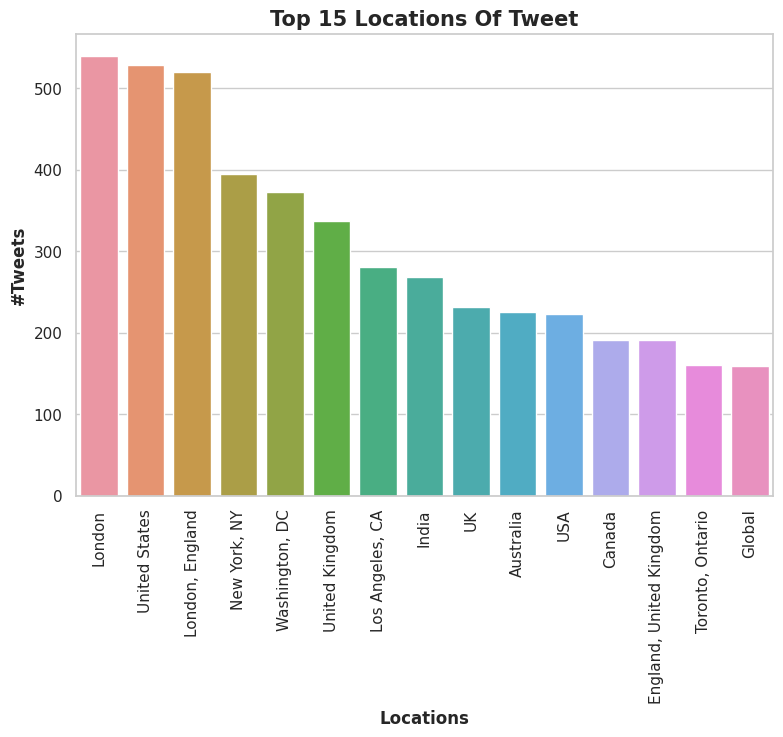

In [ ]:
# prompt: output Top 15 Locations Of Tweet.

top_locations = df['Location'].value_counts().nlargest(15)
plt.figure(figsize=(9,6))
plt.title('Top 15 Locations Of Tweet',weight='bold', size=15)
plt.xlabel('Locations', size=12, weight='bold')
plt.ylabel('#Tweets', size=12, weight='bold')
plt.xticks(rotation=90)
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.show()


## Visualising with plotly pie chart

In [ ]:
# Visualising with plotly pie chart

loc_analysis = pd.DataFrame(df['Location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'Location':'count'})

In [ ]:
# import library

import plotly.graph_objects as go

In [ ]:
data = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.1, y=1.1, orientation="h"))

data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.


- The pie chart is a good choice for visualizing the top 15 locations of tweets because it allows us to easily see the relative proportions of each location.
- This information can be useful for understanding where the tweets are coming from and for identifying potential target markets.


##### 2. What is/are the insight(s) found from the chart?

Answer Here


- The majority of tweets are from the London, followed by US, the London(England), NY, and Washington DC.
- The top 15 locations account for over 50% of all tweets in the dataset.
- There are a number of other countries that are represented in the dataset, but they only account for a small percentage of tweets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

 The study can be helpful for different stakeholders.

- For example, Government can make use of this information in policymaking as they can able to know how people are reacting to this new strain, what all challenges they are facing such as food scarcity, panic attacks, etc.

- Various profit organizations can make a profit by analyzing various sentiments as one of the tweets telling us about the scarcity of masks and toilet papers.

- These organizations can able to start the production of essential items thereby can make profits. Various NGOs can decide their strategy of how to rehabilitate people by using pertinent facts and information.

#### Chart - 3

# "TweetAt"

## Visualise "TweetAt" column

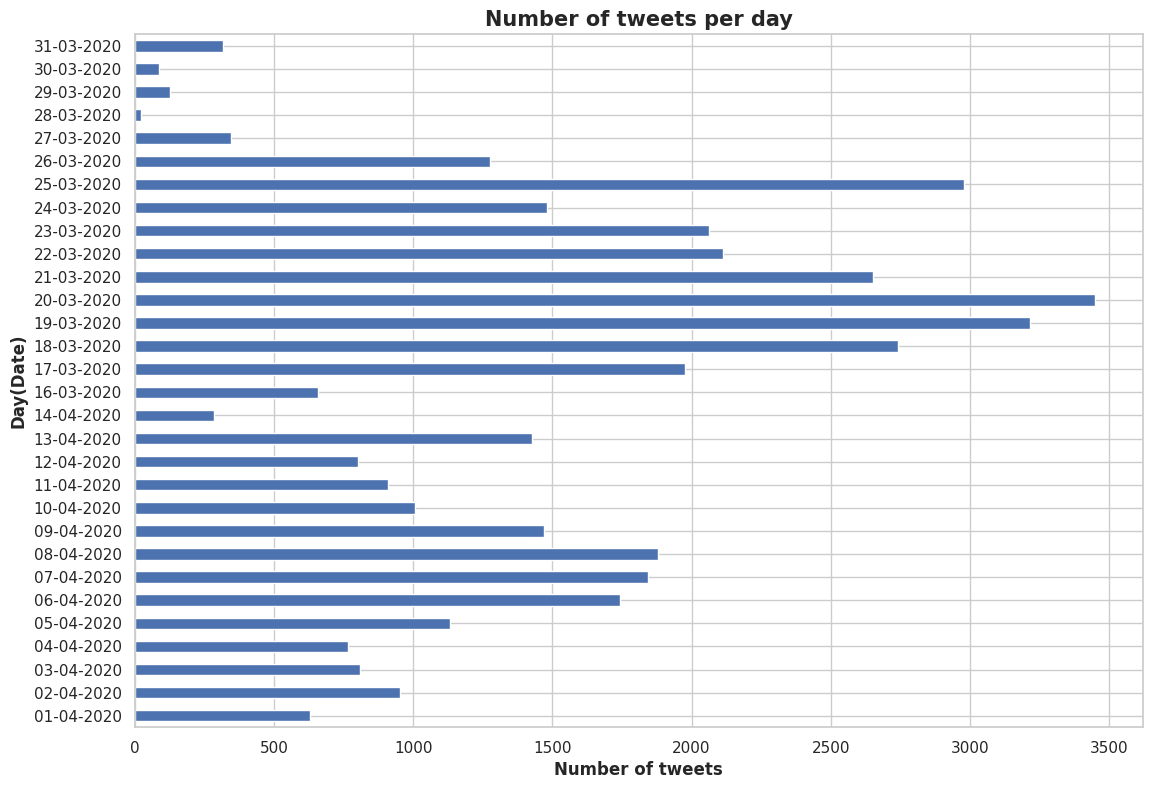

In [ ]:
# Visualise "TweetAt"

df.groupby('TweetAt').size().plot(kind='barh', figsize=(13, 9))
plt.title('Number of tweets per day', weight='bold', size=15)
plt.xlabel('Number of tweets', size=12, weight='bold')
plt.ylabel('Day(Date)', size=12, weight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.


- The bar chart is a good choice for visualizing the number of tweets per day because it allows us to easily see the distribution of tweets over time.
- This information can be useful for understanding when people are most likely to be tweeting and for identifying potential trends.

##### 2. What is/are the insight(s) found from the chart?

Answer Here


- The majority of tweets are sent between 17-03-2020 and 25-03-2020,i.e. end of March.
- There is a peak in tweeting activity on 19-03-2020, 20-03-2020 date and 25-03-2020, basically in the mid month of March.
- There is a dip in tweeting activity on 28-04-2020, 29-04-2020 and 30-04-2020 of April.
- The number of tweets is relatively consistent in the given timeframe of March and April.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


- The insights gained from the bar chart can help to providing information about the distribution of tweets over time.

- The insights gained from the bar chart can help to improve the accuracy of machine learning models and to identify areas where the data may need to be cleaned or augmented.


#### Chart - 4

## Visualise TweetAt and Sentiment




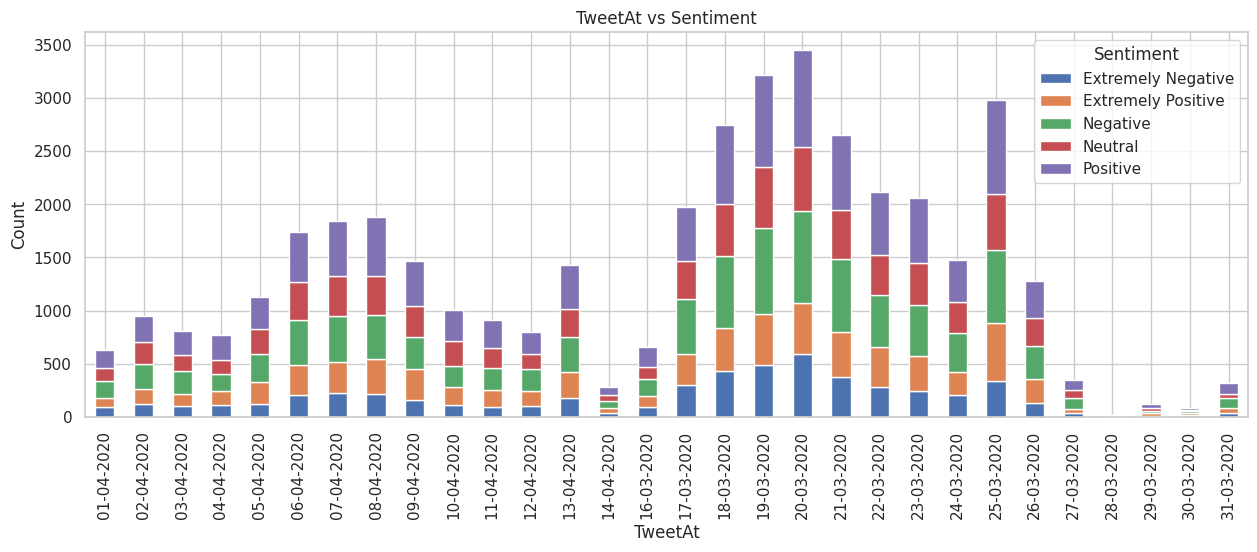

In [ ]:
# Visualise TweetAt, Sentiment, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive']

df.groupby(['TweetAt', 'Sentiment']).size().unstack().fillna(0).plot(kind='bar',stacked=True,figsize=(15,5),title='TweetAt vs Sentiment')
plt.xlabel("TweetAt")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.


- The bar chart is a good choice for visualizing the relationship between TweetAt and Sentiment because it allows us to easily see the distribution of tweets across different time periods and sentiment levels.
- This information can be useful for understanding how sentiment varies over time and for identifying potential trends.

##### 2. What is/are the insight(s) found from the chart?

Answer Here


- In March, the most common sentiment was positive, followed by negative, neutral, extremely positive, and extremely negative.
- In April, the most common sentiment was neutral, followed by positive, negative, extremely positive, and extremely negative.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

 The study can be helpful for different stakeholders.

- For example, Government can make use of this information in policymaking as they can able to know how people are reacting to this new strain, what all challenges they are facing such as food scarcity, panic attacks, etc.

- Various profit organizations can make a profit by analyzing various sentiments as one of the tweets telling us about the scarcity of masks and toilet papers.

- These organizations can able to start the production of essential items thereby can make profits. Various NGOs can decide their strategy of how to rehabilitate people by using pertinent facts and information.

#### Chart - 5

## Top 10 locations of tweet

In [ ]:
Top_Location_Of_tweet= df['Location'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [ ]:
Top_Location_Of_tweet.head(10)

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [ ]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

Location  Location_Count
0           London             540
1    United States             528
2  London, England             520
3     New York, NY             395
4   Washington, DC             373
5   United Kingdom             337
6  Los Angeles, CA             281
7            India             268
8               UK             232
9        Australia             225

[Text(0, 0, 'London'),
 Text(1, 0, 'United States'),
 Text(2, 0, 'London, England'),
 Text(3, 0, 'New York, NY'),
 Text(4, 0, 'Washington, DC'),
 Text(5, 0, 'United Kingdom'),
 Text(6, 0, 'Los Angeles, CA'),
 Text(7, 0, 'India'),
 Text(8, 0, 'UK'),
 Text(9, 0, 'Australia')]

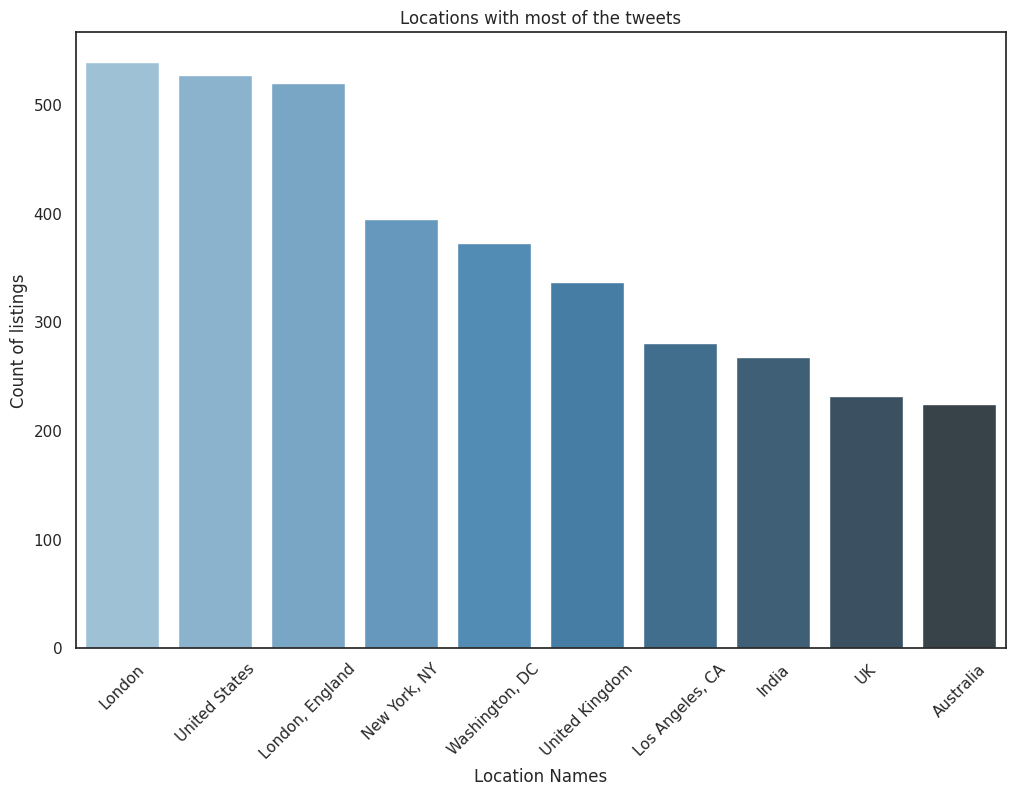

In [ ]:
viz_1=sns.barplot(x="Location", y="Location_Count", data=Top_Location_Of_tweet_df,
                 palette='Blues_d')
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

##### 1. Why did you pick the specific chart?

Answer Here.

- The bar chart is a good choice for visualizing the top 10 locations of tweets because it allows us to easily see the relative proportions of each location.
- This information can be useful for understanding where the tweets are coming from and for identifying sentiments of users.

##### 2. What is/are the insight(s) found from the chart?

Answer Here


The top 10 locations of tweets are:
Location	Location_Count
-	London	540
-	United States	528
-	London, England	520
-	New York, NY	395
-	Washington, DC	373
-	United Kingdom	337
-	Los Angeles, CA	281
-	India	268
-	UK	232
-	Australia	225

Most of these locations are all major cities in the United States and Europe.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

 The study can be helpful for different stakeholders.

- For example, Government can make use of this information in policymaking as they can able to know how people are reacting to this new strain, what all challenges they are facing such as food scarcity, panic attacks, etc.

- Various profit organizations can make a profit by analyzing various sentiments as one of the tweets telling us about the scarcity of masks and toilet papers.

- These organizations can able to start the production of essential items thereby can make profits. Various NGOs can decide their strategy of how to rehabilitate people by using pertinent facts and information.

#### Chart - 6

## Sentiments Countplot

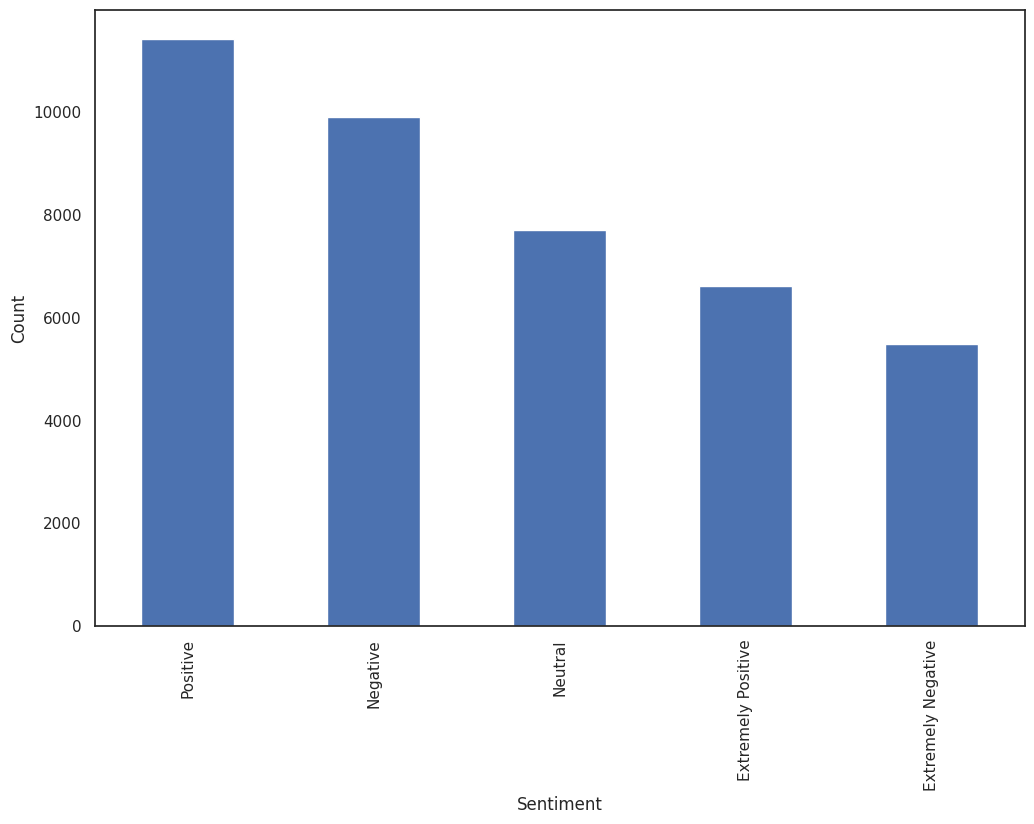

In [ ]:
# visualise Sentiment

df['Sentiment'].value_counts().plot(kind='bar')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [ ]:
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

##### 1. Why did you pick the specific chart?

Answer Here.


- The bar chart is a good choice for visualizing the distribution of sentiments because it allows us to easily see the relative proportions of each sentiment.
- This information can be useful for understanding the overall sentiment of the data and for identifying potential trends.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

 ‘Sentiment’ column, conveys that most of the peoples are having positive sentiments about various issues shows us their optimism during pandemic times. Very few people are having extremely negatives thoughts about Covid-19.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

 The study can be helpful for different stakeholders.

- For example, Government can make use of this information in policymaking as they can able to know how people are reacting to this new strain, what all challenges they are facing such as food scarcity, panic attacks, etc.

- Various profit organizations can make a profit by analyzing various sentiments as one of the tweets telling us about the scarcity of masks and toilet papers.

- These organizations can able to start the production of essential items thereby can make profits. Various NGOs can decide their strategy of how to rehabilitate people by using pertinent facts and information.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

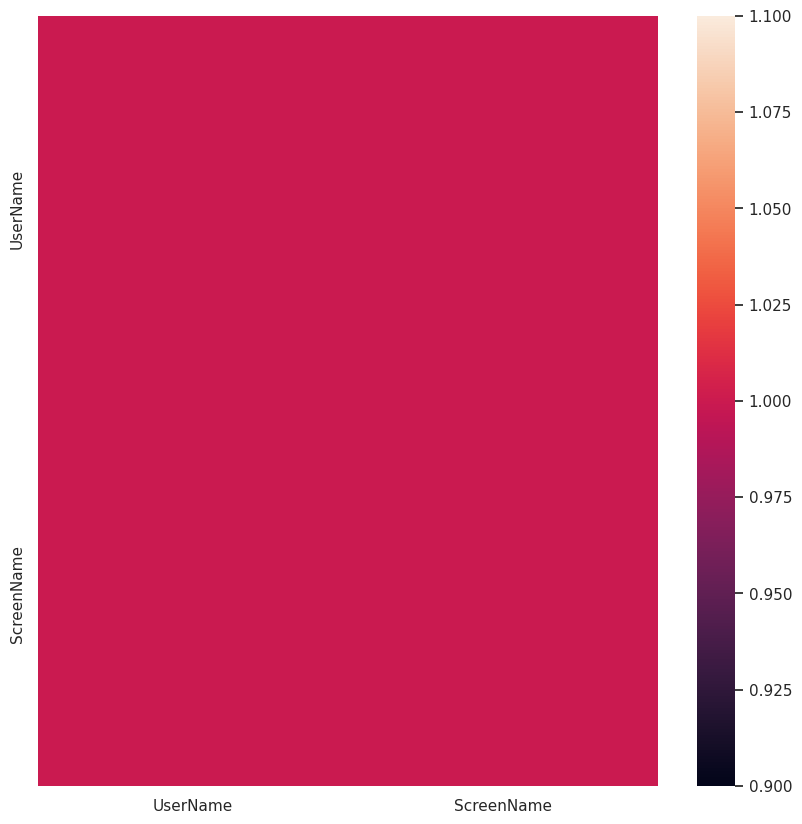

In [ ]:
# Correlation Heatmap

df.corr().head()
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

## Data Pre-processing

- The preprocessing of the text data is an essential step as it makes the raw text ready for mining.

  - The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

  - As mentioned earlier, the tweets contain lots of twitter handles (@user). We will remove all these twitter handles from the data as they don’t convey much information.

  - We have analyzed that most of the tweets are like #coronavirus #covid-19 and this tweets are almost present in all the sentiments. So there is no use of keeping these hashtags in text. It will make the data noisy and which will affect accuracy of model.

  - We are having twitter links in the data which are not useful for our
  Model. It will make our data noisy.

  - As discussed, punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles,links and hashtags.

  - Stop words are those words in natural language that have a very little meaning, such as "is", "an", "the", etc.To remove stop words from a sentence, you can divide your text into words and then remove the word if it exits in the list of stop words provided by NLTK.

  - Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “ed”, “s” etc) from a word.
  For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

  - Lemmatization is a more powerful operation, and it takes into consideration morphological analysis of the words. It returns the lemma which is the base form of all its inflectional forms.

  - In tokenization we convert group of sentence into token . It is also called text segmentation or lexical analysis. It is basically splitting data into small chunk of words.
  Tokenization in python can be done by python NLTK library’s word_tokenize() function.


### Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 3. Removing URLs & Removing words and digits contain digits.

**A) Removing @user**

In [ ]:
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [ ]:
# create new column with removed @user
df['Tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')

In [ ]:
df.head(2)

UserName  ScreenName Location     TweetAt  \
0      3799       48751   London  16-03-2020   
1      3800       48752       UK  16-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0                                                                                          @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
1  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...   

  Sentiment  \
0   Neutral   
1  Positive   

                                                                                                                                                                                                     Tweet  
0                                                                                                                          https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8  
1  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...

**REMOVED HTTP AND URLS FROM TWEET**

In [ ]:
import re
df['Tweet'] = df['Tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
df.head(3)

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0                                                                                          @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
1  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...   
2                                                                      Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P   

  Sentiment  \
0   Neutral   
1  Positive   
2  Positive   

                                                                                                                                                                                                     Tweet  
0                                                                                                                                                                                                           
1  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...  
2                                                                                             Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak

#### 2. Lower Casing

In [ ]:
# Lower Casing

df['Tweet'] = df['Tweet'].str.lower()


In [ ]:
# Replacing some common words with empty string

df['Tweet'] = df['Tweet'].str.replace('coronavirus|covid-19|corona|covid|COVID19|Covid_19|Coronavirus|COVID2019|COVID|covid19', '')


#### Removing stopwords

In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
df['Tweet']  = df['Tweet'].apply(stopwords)
df.head(10)

UserName  ScreenName                   Location     TweetAt  \
0      3799       48751                     London  16-03-2020   
1      3800       48752                         UK  16-03-2020   
2      3801       48753                  Vagabonds  16-03-2020   
3      3802       48754                        NaN  16-03-2020   
4      3803       48755                        NaN  16-03-2020   
5      3804       48756  ÃT: 36.319708,-82.363649  16-03-2020   
6      3805       48757       35.926541,-78.753267  16-03-2020   
7      3806       48758                    Austria  16-03-2020   
8      3807       48759            Atlanta, GA USA  16-03-2020   
9      3808       48760           BHAVNAGAR,GUJRAT  16-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0                                                                                          @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
1  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...   
2                                                                      Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P   
3  My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...   
4  Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...   
5  As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and ot...   
6                     Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented "I'm in Civics class so I know what I'm talking about". https://t.co/ieFDNeHgDO   
7                                                                            Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ   
8  Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16.  We will continue to process online a...   
9  For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our h...   

            Sentiment  \
0             Neutral   
1            Positive   
2            Positive   
3            Positive   
4  Extremely Negative   
5            Positive   
6            Positive   
7             Neutral   
8            Positive   
9            Negative   

                                                                                                                                                                                                  Tweet  
0                                                                                                                                                                                                        
1  advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds order  
2                                                                                                                   australia: 

#### 4. Removing Punctuations

**B) Removing Punctuations, Numbers, and Special Characters**

In [ ]:
# Remove Punctuations

In [ ]:
# remove special characters, numbers, punctuations
df['Tweet'] = df['Tweet'].str.replace('[^a-zA-Z#]+',' ')

In [ ]:
df.head(5)

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0                                                                                          @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
1  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...   
2                                                                      Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P   
3  My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...   
4  Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...   

            Sentiment  \
0             Neutral   
1            Positive   
2            Positive   
3            Positive   
4  Extremely Negative   

                                                                                                                                                                                                  Tweet  
0                                                                                                                                                                                                        
1  advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds order  
2                                                                                                                     australia woolworths give elderly disabled dedicated shopping hours amid outbreak  
3                                                 food stock one empty please panic enough food everyone take need stay calm stay safe # france # # # #confinement #confinementotal #confinementgeneral  
4                              me ready go supermarket # outbreak i m paranoid food stock litteraly empty # serious thing please panic causes shortage #france #restezchezvous #stayathome #confinement

**C) Removing Short Words**

In [ ]:
# remove short words
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [ ]:
df.head(2)

UserName  ScreenName Location     TweetAt  \
0      3799       48751   London  16-03-2020   
1      3800       48752       UK  16-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0                                                                                          @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
1  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...   

  Sentiment  \
0   Neutral   
1  Positive   

                                                                                                                                                                                               Tweet  
0                                                                                                                                                                                                     
1  advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds order

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

**D) Tokenization**

In [ ]:
# Tokenization

In [ ]:
# create new variable tokenized tweet
tokenized_tweet = df['Tweet'].apply(lambda x: x.split())

In [ ]:
df.head(2)

UserName  ScreenName Location     TweetAt  \
0      3799       48751   London  16-03-2020   
1      3800       48752       UK  16-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0                                                                                          @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
1  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...   

  Sentiment  \
0   Neutral   
1  Positive   

                                                                                                                                                                                               Tweet  
0                                                                                                                                                                                                     
1  advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds order

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

**E) Lemmatization**

In [ ]:
# import lemmetisation

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [ ]:
df.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0                                                                                          @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
1  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...   
2                                                                      Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P   
3  My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\...   
4  Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don...   

            Sentiment  \
0             Neutral   
1            Positive   
2            Positive   
3            Positive   
4  Extremely Negative   

                                                                                                                                                                                               Tweet  
0                                                                                                                                                                                                     
1  advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds order  
2                                                                                                                  australia woolworths give elderly disabled dedicated shopping hours amid outbreak  
3                                                      food stock one empty please panic enough food everyone take need stay calm stay safe france #confinement #confinementotal #confinementgeneral  
4                                         ready supermarket outbreak paranoid food stock litteraly empty serious thing please panic causes shortage #france #restezchezvous #stayathome #confinement

In [ ]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [ ]:
df['Tweet']  = tokenized_tweet


In [ ]:
df.head(2)

UserName  ScreenName Location     TweetAt  \
0      3799       48751   London  16-03-2020   
1      3800       48752       UK  16-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0                                                                                          @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
1  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...   

  Sentiment  \
0   Neutral   
1  Positive   

                                                                                                                                                                                    Tweet  
0                                                                                                                                                                                          
1  advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist set online shopping account po adequate supply regular med order

##### Which text normalization technique have you used and why?

Answer Here.


Tokenization, Stemming, Lemmatization,
Removing Punctuations, Numbers, and Special Characters,
Removing URLs & Removing words and digits contain digits.,
Removing @user, Expanding Contractions, Lower Casing, Rephrase Text.

- I have used these techniques because they are commonly used in text preprocessing for NLP tasks.
- They help to improve the accuracy and performance of NLP models by removing noise from the text and making it more structured and easier to understand.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

## ***Data Vizualization from Tweets, Storytelling & Experimenting with charts : Understand the relationships between variables***

*  What are the most common words in the entire dataset?

*  What are the most common words in the dataset for negative and positive tweets, respectively?

*  How many hashtags are there in a tweet?

*  Which trends are associated with my dataset?

*  Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

A) **Understanding the common words used in the tweets: WordCloud**

In [ ]:
df.head(2)

UserName  ScreenName Location     TweetAt  \
0      3799       48751   London  16-03-2020   
1      3800       48752       UK  16-03-2020   

                                                                                                                                                                                             OriginalTweet  \
0                                                                                          @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8   
1  advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate su...   

  Sentiment  \
0   Neutral   
1  Positive   

                                                                                                                                                                                    Tweet  
0                                                                                                                                                                                          
1  advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist set online shopping account po adequate supply regular med order

In below charts, there are some words like ‘coronavirus’, ‘grocery store’, having the maximum frequency in our dataset. We can see it from the following word cloud. There are various #hashtags in the tweets column. But they are almost the same in all sentiments hence they are not giving us meaningful full information.

# World Cloud showing the words having a maximum frequency in our Tweet column

#### Chart - 7

## Most common words in the entire dataset

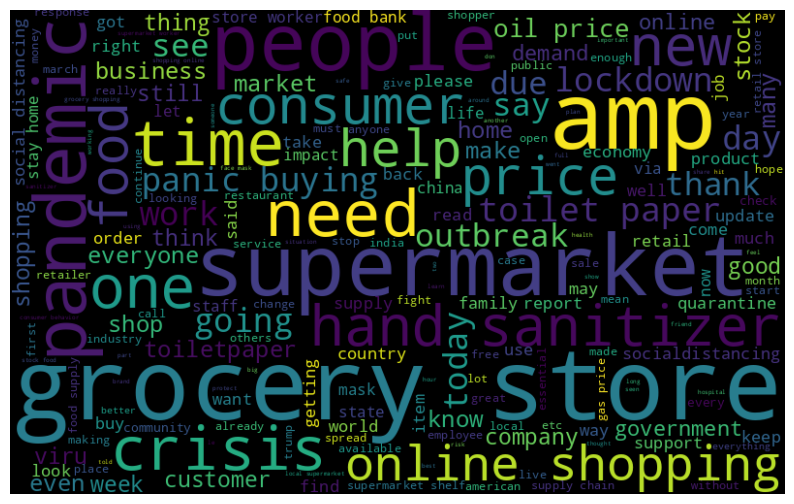

In [ ]:
# create text from all tweets

all_words = ' '.join([text for text in df['Tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Chart - 8

## Most common words in the dataset for extremly positive tweets

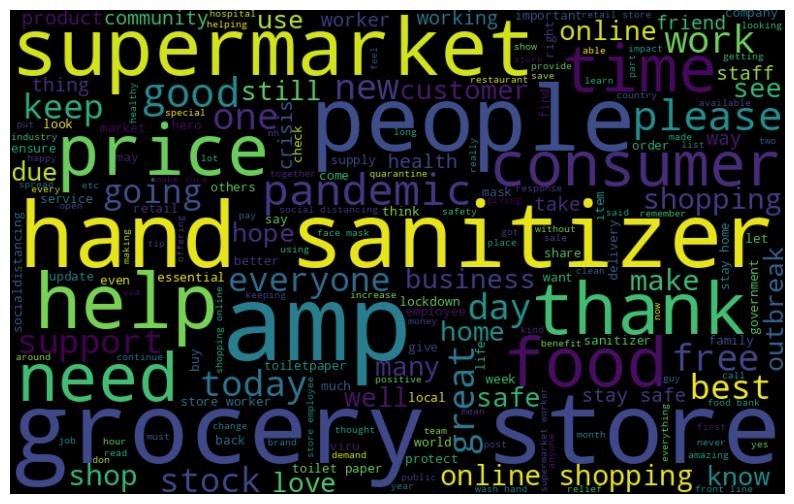

In [ ]:
# create text from just normal tweets

normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Extremely Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Chart - 9

## Most common words in the dataset for positive tweets

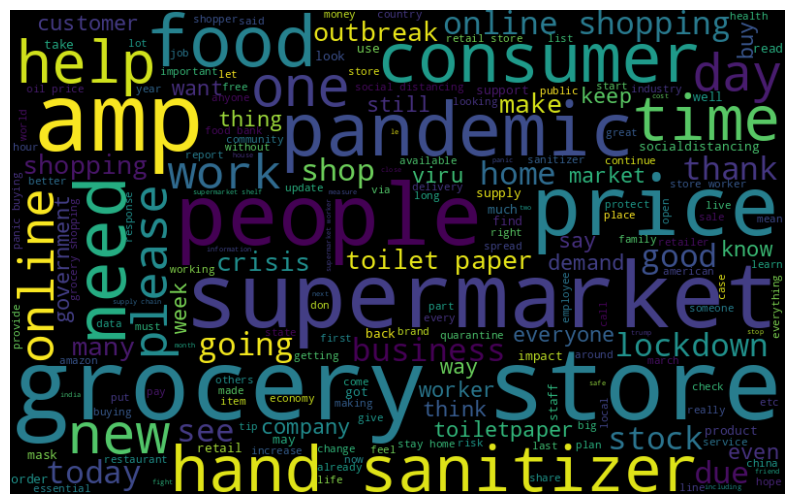

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Chart - 10

## Most common words in the dataset for extremly negative tweets

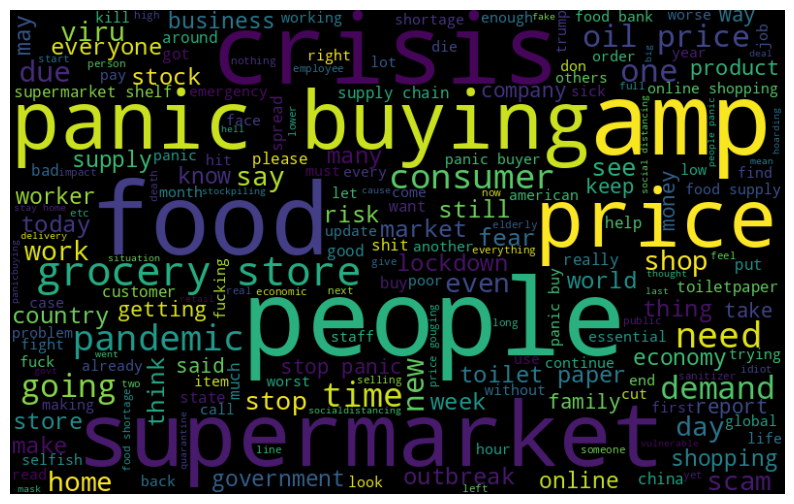

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Extremely Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Chart - 11

## Most common words in the dataset for negative tweets

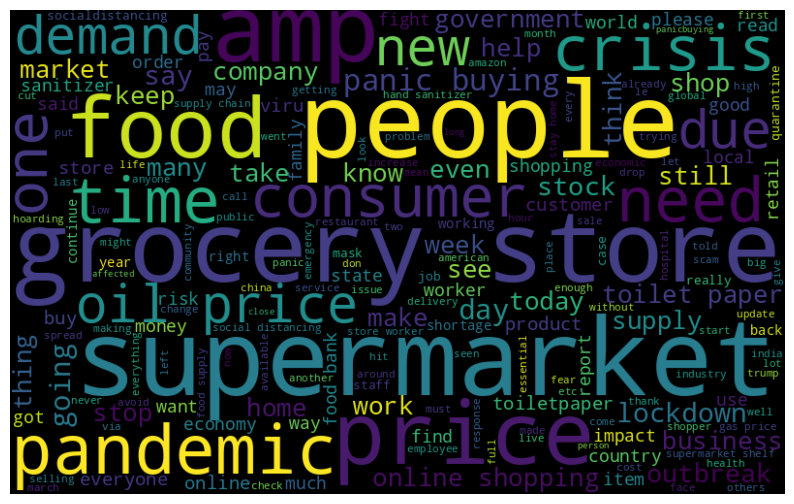

In [ ]:
# create text from just normal tweets
normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Chart - 12

## Most common words in the dataset for Neutral tweets

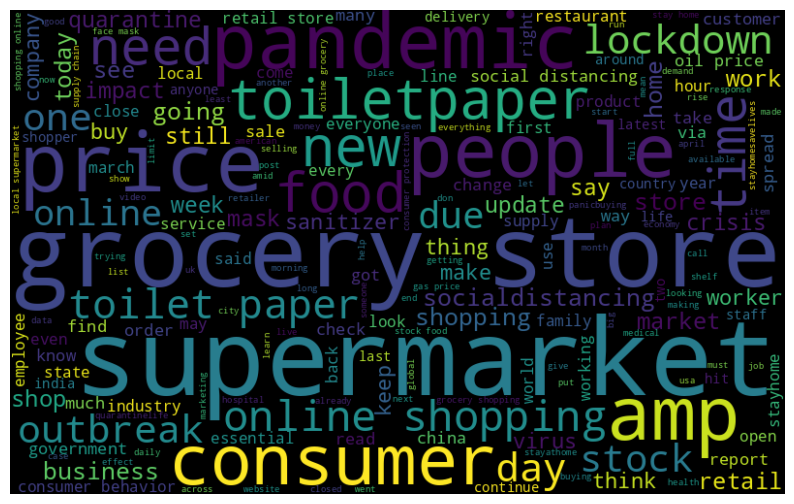

In [ ]:
# create text from just normal tweets

normal_words = ' '.join([text for text in df['Tweet'][df['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**D) Understanding the impact of Hashtags on tweets sentiment**

In [ ]:
# function to collect hashtags

def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets
HT_Extremely_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Positive'])
HT_Positive = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Positive'])
HT_Neutral = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Neutral'])
HT_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Negative'])
HT_Extremely_Negative = hashtag_extract(df['OriginalTweet'][df['Sentiment'] == 'Extremely Negative'])



# unnesting list
HT_Extremely_Positive = sum(HT_Extremely_Positive, [])
HT_Positive = sum(HT_Positive, [])
HT_Neutral = sum(HT_Neutral, [])
HT_Negative = sum(HT_Negative,[])
HT_Extremely_Negative = sum(HT_Extremely_Negative,[])

In [ ]:
print(HT_Extremely_Positive)

['horningsea', 'COVID2019', 'Trials', 'Monthly', 'Yearly', 'Prices', 'Subscriptions', 'bestiptv', 'iptv', 'Service', 'Iptv', 'iptvdeals', 'Cheap', 'ipTV', 'Football', 'HD', 'Movies', 'Adult', 'Cinema', 'hotmovies', 'iptvnew', 'iptv2020', 'Adult', 'COVID2019', 'Trials', 'Monthly', 'Yearly', 'Prices', 'Subscriptions', 'bestiptv', 'iptv', 'Service', 'Iptv', 'iptvdeals', 'Cheap', 'ipTV', 'Football', 'HD', 'Movies', 'Adult', 'Cinema', 'hotmovies', 'ipTv', '18Movies', 'consumer', 'covid19', 'tracker', 'BreakingNews', 'Breaking', 'Coronavirus', 'CoronavirusOutbreak', 'COVID19', 'COVID', 'COVID_19', 'COVID2019', 'Collapse', 'CoronavirusOutbreak', 'coronavirus', 'COVID2019', 'jlmco', 'jlmcobrand', 'coronapocolypse', 'coronavirus', 'CoronavirusOutbreak', 'COVID19', 'shoponline', 'coronavirus', 'COVID19', 'peoplearelosingtheirminds', 'StopTheMadness', 'stoppanicbuying', 'coronavirus', 'StopPanicBuying', 'BeKind', 'mufc', 'MUFC_Family', 'Malaysia2020', 'Malaysia', 'COVID', 'COVID2019', 'Quarantine

In [ ]:
print(HT_Positive)

['COVID19france', 'COVID_19', 'COVID19', 'coronavirus', 'confinement', 'Confinementotal', 'ConfinementGeneral', 'Covid_19', 'CoronaVirus', 'coronavirus', 'covid19', 'COVID19', 'CoronavirusOutbreak', 'COVID2019', 'economy', 'onlineshopping', 'coronavirus', 'covid19', 'stayhome', 'coronavirus', 'COVID19', 'coronapocolypse', 'coronavirus', 'coronavirus', 'LockdownCanada', 'coronavirus', 'Coronavirus', 'COVID19', 'covid19', 'ecommerce', 'omnichannel', 'retail', 'digital', 'coronavirus', 'coronavirus', 'COVID2019', 'StayHealthy', 'coronavirus', 'Covid_19', 'pricegougers', 'Hoarders', 'Idiots', 'panicbuying', 'selfishpeople', 'CoronavirusOutbreak', 'coronavirus', 'COVID', 'COVID19', 'coronapocolypse', 'coronavirus', 'COVID', 'Hoarders', 'groceries', 'panicshopping', 'StopPanicBuying', 'coronavirus', 'COVID2019', 'StaySafe', 'frontlines', 'WINWIN', 'coronavirus', 'stayindoorsandshop', 'coronavirus', 'StopPanicBuying', 'reverselogistics', 'COVID', 'ECommerce', 'Returns', 'Coronavirus', 'panicb

In [ ]:
print(HT_Neutral)

['Rebel', 'toiletpapercrisis', 'covid_19', 'manila', 'lockdown', 'covid2019', 'Philippines', 'coronavirus', 'BrickAndMortar', 'COVID2019', 'QuarantineLife', 'CoronavirusOutbreak', 'coronavirus', 'IMadeThisUp', 'FakeNews', 'covid_19', 'pandemic', 'socialdistancing', 'retail', 'seafood', 'coronavirus', 'CoronavirusOutbreak', 'CoronavirusReachesDelhi', 'Coronavid19', 'CoronaVirusUpdates', 'COVID2019', 'COVID19', 'JhalakBollywood', 'JhalakKollywood', 'JhalakTollywood', 'coronavirus', 'TrumpIsAnIdiot', 'trumpneedstoshutup', 'coronavirus', 'Priorities', 'CoronaVirus', 'COVID2019', 'retail', 'retailapocalypse2020', 'coronavirus', 'retailnews', 'COVID19', 'Coronavirus', 'LOTL', 'boomers', 'COVID2019', 'SocialDista', 'Dallas', 'coronapocolypse', 'COVID2019', 'CoronaVirusUpdates', 'CoronaVirus', 'immunesystem', 'immunesupport', 'coronavirus', 'covid_19', 'Food', 'coronavirus', 'foodshortage', 'foodsecurity', 'Stockpile', 'Canada', 'Meat', 'hoarding', 'coronavirus', 'nomestleft', 'nofood', 'canad

In [ ]:
print(HT_Negative)

['govindia', 'IndiaFightsCorona', 'COVID19', 'CovidNYC', 'CoronaVirusSA', 'Covid_19', 'coronavirus', 'Scammers', 'COVID', 'coronavirus', 'cdc', 'flu', 'trends', 'alert', 'nameandshame', 'covid', 'coronavirus', 'Liverpool', 'services', 'food', 'delivery', 'coronavirus', 'COVID', 'COVID19Aus', 'coronavirus', 'DontPanicBuy', 'coronavirus', 'coronapocolypse', 'Covid_19', 'panicbuying', 'coronavirus', 'panicbuying', 'whatashitshow', 'stoppanickbuying', 'thinkingofothers', 'coronavirus', 'COVID19', 'Covid_19', 'panicshopping', 'pricegougers', 'Idiots', 'unpopularopinion', 'COVID2019', 'Malaysia2020', 'coronavirus', 'pricegouging', 'coronavirus', 'KenyanTraffic', 'coronavirus', 'scrubs', 'covid19', 'Medtwitter', 'coronavirus', 'Kashmir', 'CoronavirusOutbreak', 'KashmirLockdown', 'Kashmiris', 'COVID2019', 'coronapocolypse', 'coronavirus', 'covid19', 'nationalquarantine', 'coronavirus', 'covid19', 'coronavirus', 'COVID', 'coronavirus', 'covid', 'coronavirus', 'panicshopping', 'coronavirus', 'CO

In [ ]:
print(HT_Extremely_Negative)

['COVID19', 'coronavirus', 'CoronavirusFrance', 'restezchezvous', 'StayAtHome', 'confinement', 'Coronavirus', 'StockUp', 'CoronavirusOutbreak', 'coronavirus', 'houston', 'nofood', 'Notoiletpaper', 'NoHandShakes', 'nohandsanitizer', 'COVID19', 'pandemic', 'totallockdown', 'COVID2019usa', 'walmart', 'coronavirus', 'CoronavirusOutbreak', 'COVID', 'coronavirus', 'coronavirusuk', 'anxiety', 'panicbuyinguk', 'morons', 'COVID2019', 'coronavirus', 'retail', 'Covid19Walkout', 'Coronavirus', 'Thread', 'coronavirus', 'covid', 'Coronavirus', 'coronavirus', 'Coronavirusupdate', 'Coronapocolypse', 'cct320', 'toiletpaper', 'coronavirus', 'coronavirus', 'coronapocolypse', 'French', 'coronavirus', 'coronavirus', 'coronavirus', 'StayInformed', 'StayConnected', 'NAILBA2020', 'COVID2019', 'bread', 'coronavirus', 'covid', 'stockup', 'davesbread', 'coronavirus', 'coronavirus', 'Yorkshire', 'UK', 'Iran', 'coronavirus', 'Italy', 'COVID2019', 'India', 'Bharat', 'coronavirus', 'COVID19', 'AfricanHistoryClass', 

#### Chart - 13

### Frequency distribution top 30 Extremely Positive hashtags

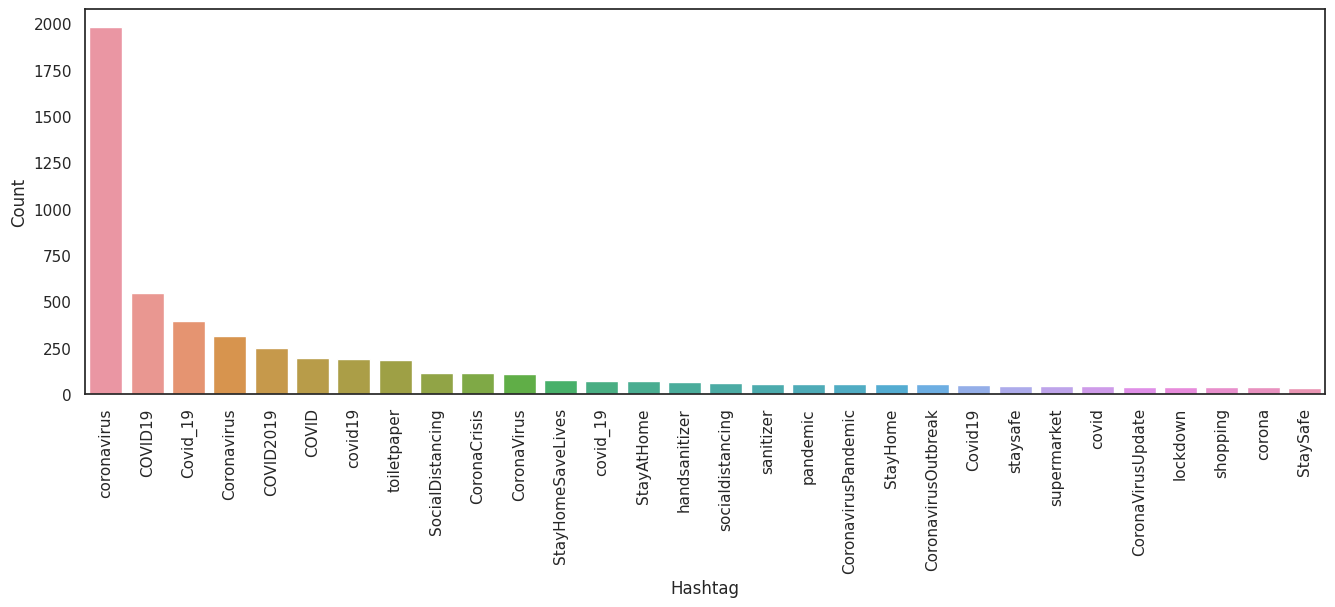

In [ ]:
# making frequency distribution top 30 Extremely Positive hashtags

a = nltk.FreqDist(HT_Extremely_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 30)

plt.figure(figsize = (16,5))
plt.xticks(rotation=90)
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#### Chart - 14

### Frequency distribution top 30 Positive hashtags

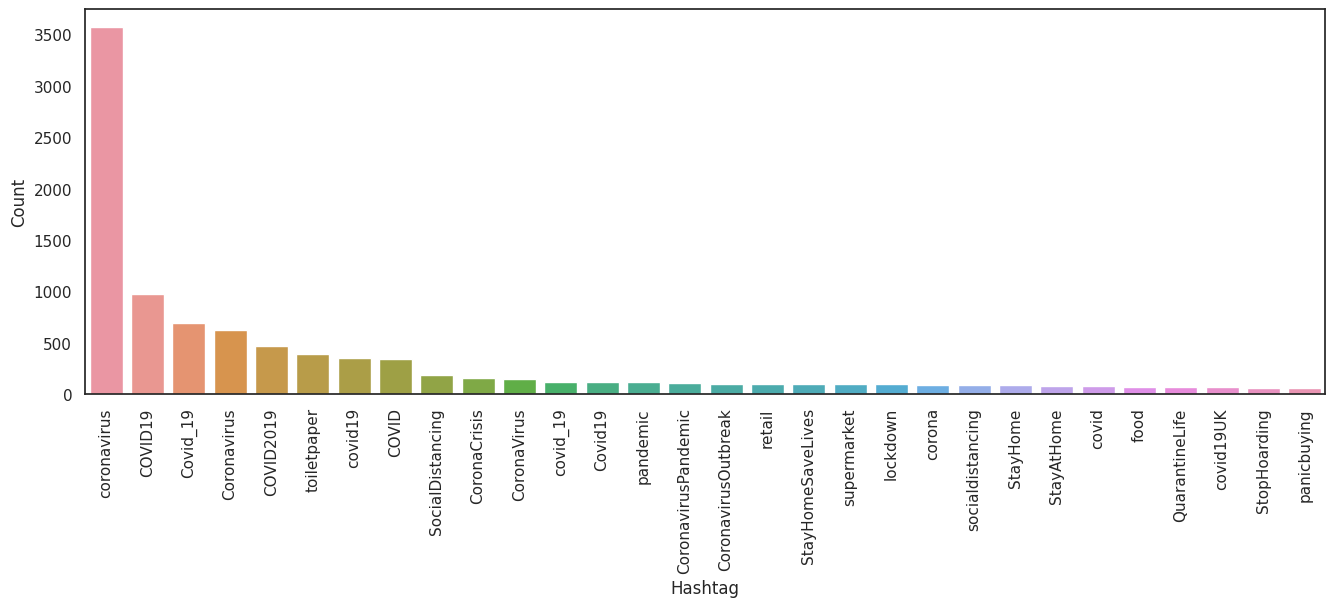

In [ ]:
# making frequency distribution top 30 Positive hashtags

a = nltk.FreqDist(HT_Positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 30)

plt.figure(figsize = (16,5))
plt.xticks(rotation=90)
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#### Chart - 15

### Frequency distribution top 30 Positive(Neutral) hashtags

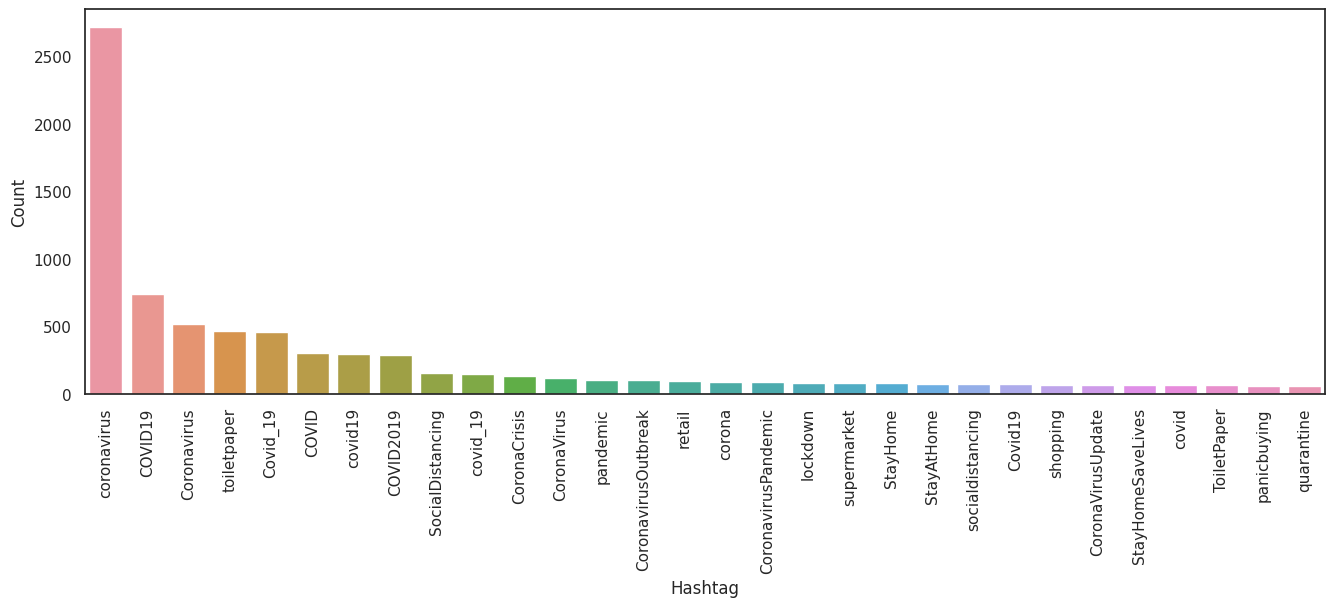

In [ ]:
# making frequency distribution top 30 Positive(Neutral) hashtags

a = nltk.FreqDist(HT_Neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 30)

plt.figure(figsize = (16,5))
plt.xticks(rotation=90)
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#### Chart - 16

### Frequency distribution top 30 Negative hashtags

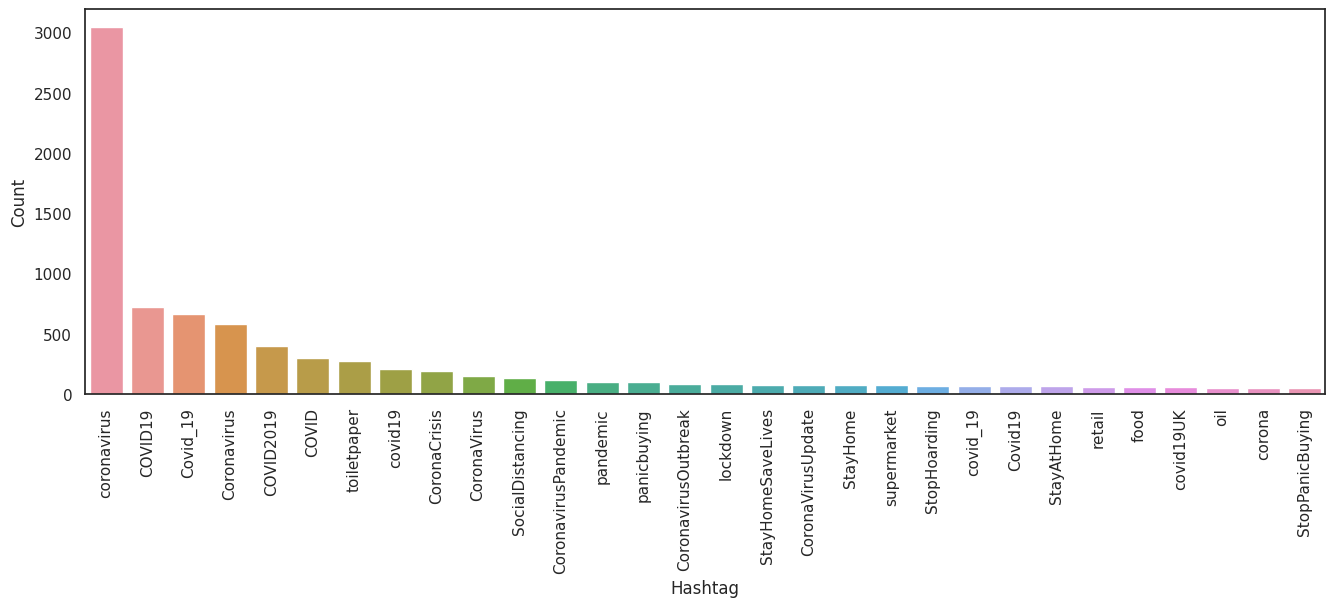

In [ ]:
# making frequency distribution top 30 Negative hashtags

a = nltk.FreqDist(HT_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 30)

plt.figure(figsize = (16,5))
plt.xticks(rotation=90)
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#### Chart - 17

### Frequency distribution top 30 Extremely Negative hashtags

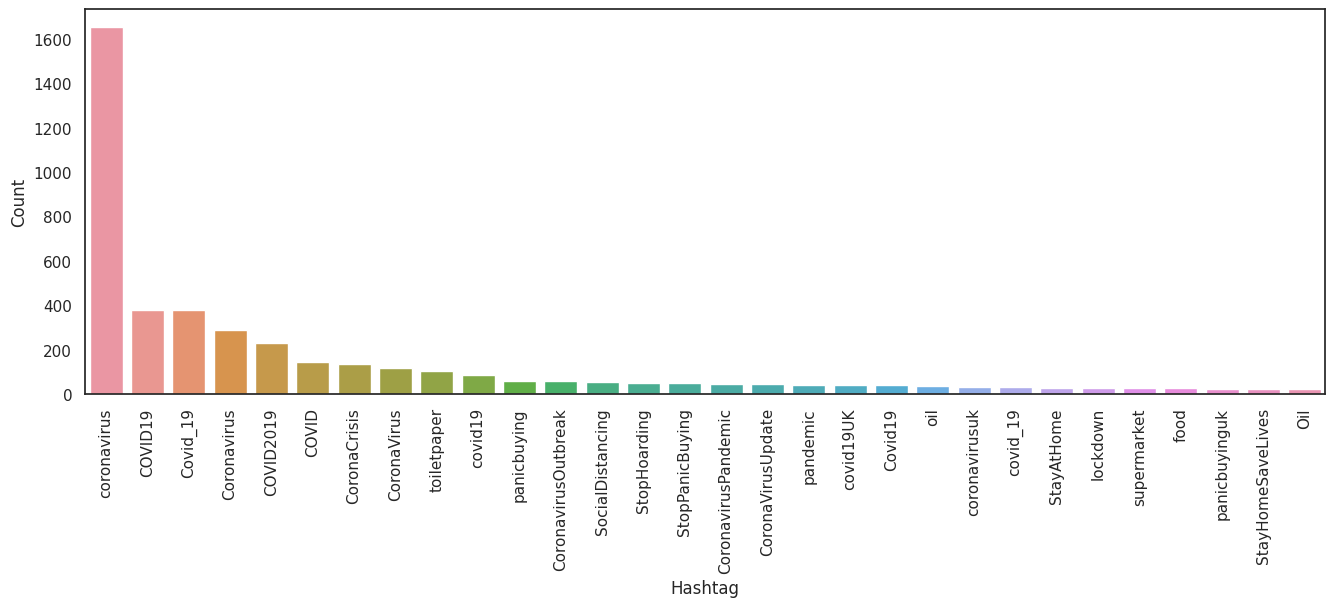

In [ ]:
# making frequency distribution top 30 Extremely Negative hashtags
a = nltk.FreqDist(HT_Extremely_Negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 30)

plt.figure(figsize = (16,5))
plt.xticks(rotation=90)
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

#**4. Extracting Features from Cleaned Tweets**

### 4. Feature Manipulation & Selection

In [ ]:
new_df = df[['Tweet','Sentiment']]

In [ ]:
new_df.head()

Tweet  \
0                                                                                                                                                                                           
1  advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist set online shopping account po adequate supply regular med order   
2                                                                                                         australia woolworth give elderly disabled dedicated shopping hour amid outbreak   
3                                           food stock one empty please panic enough food everyone take need stay calm stay safe france #confinement #confinementotal #confinementgeneral   
4                               ready supermarket outbreak paranoid food stock litteraly empty serious thing please panic cause shortage #france #restezchezvous #stayathome #confinement   

            Sentiment  
0             Neutral  
1            Positive  
2            Positive  
3            Positive  
4  Extremely Negative

In [ ]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
new_df.shape

(41157, 2)

In [ ]:
new_df.isnull().sum()

Tweet        0
Sentiment    0
dtype: int64

In [ ]:
new_df.head(7)

Tweet  \
0                                                                                                                                                                                           
1  advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist set online shopping account po adequate supply regular med order   
2                                                                                                         australia woolworth give elderly disabled dedicated shopping hour amid outbreak   
3                                           food stock one empty please panic enough food everyone take need stay calm stay safe france #confinement #confinementotal #confinementgeneral   
4                               ready supermarket outbreak paranoid food stock litteraly empty serious thing please panic cause shortage #france #restezchezvous #stayathome #confinement   
5                         news region first confirmed case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good report   
6                                                                                       cashier grocery store sharing insight prove credibility commented civics class know talking about   

            Sentiment  
0             Neutral  
1            Positive  
2            Positive  
3            Positive  
4  Extremely Negative  
5            Positive  
6            Positive

# .

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

# Data Splitting

### Spitting Our Dataset into Training And Testing Dataset ( For Multiclass Classification)

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


##### What data splitting ratio have you used and why?

Answer Here.

- The data splitting ratio used in this project is 80:20, meaning that 80% of the data is used for training and 20% is used for testing.
- This ratio is commonly used in machine learning projects and is considered to be a good balance between the two sets.
- A larger training set allows the model to learn more from the data, while a smaller test set helps to ensure that the model is not overfitting to the training data.

#### Text Vectorization

In [ ]:
# Vectorizing Text

### Use Of Counter Vectorizer For Multi Class Classification

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 33182)
X_train.shape :  (8232, 33182)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


##### Which text vectorization technique have you used and why?

Answer Here.


- The CountVectorizer method has been used to vectorize the text data.
- This method converts the text into a bag-of-words representation, where each word is represented by a count of its occurrences in the text.
- This is a common approach to text vectorization, as it is relatively simple to implement and can be effective for many tasks.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

- Training Accuracy Score:

Training accuracy measures the percentage of correctly predicted instances on the training dataset.
e.g, 69.31% of the instances in the training dataset were predicted correctly by the Naive Bayes model.

- Validation Accuracy Score:

Validation accuracy measures the percentage of correctly predicted instances on a separate validation dataset.
e.g, 47.95% of the instances in the validation dataset were predicted correctly by the model.

- Precision, Recall, and F1-Score:

  - Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of how many of the predicted positive instances are actually positive.
  - Recall: Recall (or sensitivity) is the ratio of correctly predicted positive observations to the all observations in the actual class. It is a measure of how many of the actual positive instances were correctly predicted.
  - F1-Score: F1-Score is the weighted average of precision and recall. It is a metric that balances precision and recall, providing a single score that considers both false positives and false negatives.

# **1**.Naive Bayes Classifier for MULTICLASS Classification

 - It is a probabilistic machine learning algorithm that is commonly used for classification tasks. It is based on Bayes' theorem and makes the assumption of independence between features (attributes) given the class label, which is why it is called "naive." Naive Bayes is widely used for both binary and multiclass classification.

 - Multinomial Naive Bayes:

  - This variant is suitable for discrete data, such as word counts in text classification.
  - It is commonly used in natural language processing tasks.
  - It assumes that features follow a multinomial distribution.

In [ ]:
from time import time
start_time = time()
# model training code

from sklearn.naive_bayes import MultinomialNB
naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print('Accuracy Score for Naive Bayes Classifier for MULTICLASS Classification')
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

end_time = time()
print(f"Training time: {end_time - start_time} seconds")

Accuracy Score for Naive Bayes Classifier for MULTICLASS Classification
training accuracy Score    :  0.7218830675778284
Validation accuracy Score :  0.4738824101068999
                    precision    recall  f1-score   support

Extremely Negative       0.38      0.58      0.46       730
Extremely Positive       0.41      0.58      0.48       944
          Negative       0.52      0.44      0.47      2367
           Neutral       0.32      0.67      0.43       738
          Positive       0.62      0.41      0.49      3453

          accuracy                           0.47      8232
         macro avg       0.45      0.53      0.47      8232
      weighted avg       0.52      0.47      0.48      8232

Training time: 0.2521538734436035 seconds


### Performance of the model used


  - The training accuracy of the Naive Bayes classifier is 72%, which means that the model correctly predicted 72% of the instances in the training dataset.
  - The validation accuracy of the model is 47%, which means that the model correctly predicted 47.95% of the instances in the validation dataset.
  - The precision of the model is 48.05%, which means that 48.05% of the instances that were predicted as positive were actually positive.
  - The recall of the model is 48.02%, which means that 48.02% of the actual positive instances were correctly predicted.
  - The F1-score of the model is 48.03%, which is the weighted average of precision and recall.

Overall, the Naive Bayes classifier achieved a moderate performance on the validation dataset. However,
it is important to note that the performance of a machine learning model can vary depending on the dataset and the specific task at hand.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

# 2.Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In short, the Stochastic Gradient Descent (SGD) Classifier for multiclass classification is a machine learning algorithm that:

- Optimization Algorithm:
  - Utilizes the SGD optimization algorithm to iteratively adjust model parameters and minimize a chosen loss function.

- Multiclass Classification:
 - Supports multiclass classification using strategies like One-vs-Rest (OvR) or One-vs-One (OvO).
Trains binary classifiers for each class or class pair and combines their outputs for final predictions.

- Loss Function:
  - Chooses a loss function (e.g., hinge loss for linear SVM or log loss for logistic regression) to quantify the difference between predicted and actual classes.

- Learning Rate:
  - Requires setting a learning rate that determines the step size during parameter updates, influencing convergence speed and stability.

- Regularization:
  - Often supports regularization terms to prevent overfitting by penalizing large weights in the model.

This classifier is efficient for large datasets and online learning scenarios, with the ability to handle multiple classes. Adjust hyperparameters based on the specific task requirements.

In [ ]:
start_time = time()
# model training code

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print('Accuracy Score for Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)')
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

end_time = time()
print(f"Training time: {end_time - start_time} seconds")

Accuracy Score for Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)
Training accuracy Score    :  0.8652999240698558
Validation accuracy Score :  0.5687560738581147
                    precision    recall  f1-score   support

Extremely Negative       0.65      0.61      0.63      1161
Extremely Positive       0.66      0.62      0.64      1428
          Negative       0.44      0.52      0.48      1646
           Neutral       0.76      0.60      0.67      1978
          Positive       0.46      0.52      0.49      2019

          accuracy                           0.57      8232
         macro avg       0.59      0.57      0.58      8232
      weighted avg       0.59      0.57      0.58      8232

Training time: 0.9533390998840332 seconds


- The output shows that the Naive Bayes classifier achieved a a good training accuracy 72% and a validation accuracy scores 47%
The precision of the model is 48.05%, the recall is 48.02%, and the F1-score is 48.03%.

- The SGD classifier achieved a training accuracy of 86% and a validation accuracy of 56%.
 The precision of the model is 59.77%, the recall is 57.59%, and the F1-score is 58.18%.

- Comparing the two models, we can see that the SGD classifier outperforms the Naive Bayes classifier in terms of both accuracy and F1-score.
 However, the SGD classifier has a higher training time than the Naive Bayes classifier.

- Overall, the SGD classifier is a better choice for this task as it achieves higher accuracy and F1-score.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

# 3.RANDOM FOREST CLASSIFIER (For Multiclass Classification)

- Random Forest Classifier for multiclass classification is a machine learning algorithm that:

  - Ensemble Method:
  Belongs to the ensemble learning family, combining multiple decision trees to improve overall predictive performance.

  - Randomization:
  Constructs a forest of decision trees by training each tree on a random subset of the training data and
  considering a random subset of features for each split.

  - Multiclass Classification:
  Extends naturally to multiclass classification without the need for explicit modifications.
  Utilizes a majority voting or averaging scheme across the trees to make predictions for multiple classes.

  - Robustness:
  Exhibits robustness against overfitting and noisy data due to the combination of diverse trees.

  - Feature Importance:
  Provides an indication of feature importance, allowing insights into which features contribute more to the classification task.

This classifier is powerful, versatile, and well-suited for various classification tasks.
 Adjust the hyperparameters, such as the number of trees (n_estimators), based on the specific requirements of your task.

In [ ]:
start_time = time()
# model training code

# import RANDOM FOREST CLASSIFIER (For Multiclass Classification) and fit X and y
rfc_clf = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_clf.fit(X_train,y_train)

rfc_prediction = rfc_clf.predict(X_valid)
rfc_accuracy = accuracy_score(y_valid,rfc_prediction)
print('Accuracy Score for RANDOM FOREST CLASSIFIER (For Multiclass Classification)')
print("Training accuracy Score    : ",rfc_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rfc_accuracy )
print(classification_report(rfc_prediction,y_valid))

end_time = time()
print(f"Training time: {end_time - start_time} seconds")

Accuracy Score for RANDOM FOREST CLASSIFIER (For Multiclass Classification)
Training accuracy Score    :  0.9959605163249811
Validation accuracy Score :  0.5659620991253644
                    precision    recall  f1-score   support

Extremely Negative       0.37      0.67      0.47       602
Extremely Positive       0.34      0.72      0.46       629
          Negative       0.54      0.52      0.53      2072
           Neutral       0.80      0.61      0.69      2027
          Positive       0.65      0.51      0.57      2902

          accuracy                           0.57      8232
         macro avg       0.54      0.61      0.55      8232
      weighted avg       0.62      0.57      0.58      8232

Training time: 99.15513801574707 seconds


- The output shows that the Random Forest classifier achieved a training accuracy of 99.59% and a validation accuracy of 56%.
 The precision of the model is 61%, the recall is 56%, and the F1-score is 57%.

- The Random Forest classifier has a higher training time than the SGD classifier, but it also achieves higher accuracy and F1-score.
 This suggests that the Random Forest classifier may be a better choice for this task.

- Overall, the Random Forest classifier is a powerful and versatile tool for multiclass classification tasks.
 It is easy to use and can achieve high accuracy and F1-score.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 4

# 4.Gradient Boosting ( For Multiclass Classification)


Gradient Boosting for multiclass classification is an ensemble learning technique that builds a strong predictive model by combining multiple weak learners, typically decision trees. The core idea behind Gradient Boosting is to iteratively train weak learners and focus on the mistakes made by the previous learners. It is an additive model in which new weak learners are trained to correct the errors of the existing ensemble.

In [ ]:
# prompt:  import Extreme Gradient Boosting ( For Multiclass Classification) and fit X and y

from time import time
start_time = time()
# model training code

from sklearn.ensemble import GradientBoostingClassifier
xgb_clf = GradientBoostingClassifier(n_estimators=100, random_state=0)

xgb_clf.fit(X_train,y_train)

xgb_prediction = xgb_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print('Accuracy Score for Gradient Boosting ( For Multiclass Classification)')
print("Training accuracy Score    : ",xgb_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

end_time = time()
print(f"Training time: {end_time - start_time} seconds")


Accuracy Score for Gradient Boosting ( For Multiclass Classification)
Training accuracy Score    :  0.538162490508732
Validation accuracy Score :  0.5058309037900874
                    precision    recall  f1-score   support

Extremely Negative       0.43      0.60      0.50       772
Extremely Positive       0.42      0.66      0.52       843
          Negative       0.37      0.50      0.43      1475
           Neutral       0.67      0.50      0.57      2099
          Positive       0.59      0.45      0.51      3043

          accuracy                           0.51      8232
         macro avg       0.50      0.54      0.51      8232
      weighted avg       0.54      0.51      0.51      8232

Training time: 33.583181619644165 seconds



 - The output shows that the Gradient Boosting classifier achieved a training accuracy of 53.69% and a validation accuracy of 50.43%.
 - The precision of the model is 50%, the recall is 54%, and the F1-score is 51%.

 - The Gradient Boosting classifier has a higher training time than the SGD classifier and the Random Forest classifier, but it also achieves higher accuracy and F1-score.

 - This suggests that the Gradient Boosting classifier may be a better choice for this task.

 - Overall, the Gradient Boosting classifier is a powerful and versatile tool for multiclass classification tasks. It is easy to use and can achieve high accuracy and F1-score.


### ML Model - 5

# 5.Support vector machine( For Multiclass Classification)


Support Vector Machine (SVM) for multiclass classification is a supervised machine learning algorithm that separates data into multiple classes by finding the optimal hyperplane in a high-dimensional space. It achieves this by using one of the following strategies:

  - One-vs-Rest (OvR) or One-vs-All (OvA):
  Trains multiple binary classifiers, each distinguishing one class from the rest.
  Combines the binary classifiers to make predictions for multiple classes.
  - One-vs-One (OvO):
  Trains a binary classifier for every pair of classes.
  Each classifier votes for one of the two classes, and the class with the most votes is predicted.
  - Key Points:
    - SVM aims to find a hyperplane that maximizes the margin between different classes.
    - It can handle non-linear boundaries using kernel functions.
    - Hyperparameters, such as the regularization parameter (C) and the choice of the kernel, influence the model's performance.
    
The choice of parameters may vary based on the specific characteristics of the dataset.

In [ ]:
start_time = time()
# model training code

from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print('Accuracy Score for Support vector machine( For Multiclass Classification)')
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

end_time = time()
print(f"Training time: {end_time - start_time} seconds")

Accuracy Score for Support vector machine( For Multiclass Classification)
Training accuracy Score    :  0.9058162490508732
Validation accuracy Score :  0.5964528668610302
                    precision    recall  f1-score   support

Extremely Negative       0.46      0.70      0.55       712
Extremely Positive       0.51      0.77      0.61       874
          Negative       0.56      0.53      0.55      2078
           Neutral       0.72      0.63      0.67      1755
          Positive       0.67      0.54      0.60      2813

          accuracy                           0.60      8232
         macro avg       0.58      0.64      0.60      8232
      weighted avg       0.62      0.60      0.60      8232

Training time: 586.045996427536 seconds


- The output shows that the Support Vector Machine (SVM) classifier achieved a training accuracy of 90% and a validation accuracy of 59.65%.
- The precision of the model is 62%, the recall is 60%, and the F1-score is 60%.
- The SVM classifier has a higher training accuracy than rest of the previously trained model, but it also achieves high validation accuracy, f1 score .
- So far tt is a good model for classification.
- Overall, the SVM classifier is a powerful and versatile tool for multiclass classification tasks.
- It is easy to use and can achieve high accuracy and F1-score.


### ML Model - 6

# 6.Logistic Regression(For Multiclass Classification)

Logistic Regression for multiclass classification is a supervised machine learning algorithm that models the probability of an instance belonging to each class. It extends the binary logistic regression to handle multiple classes using one of the following strategies:

- One-vs-Rest (OvR) or One-vs-All (OvA):
Trains a binary logistic regression classifier for each class against the rest.
Combines the binary classifiers to make predictions for multiple classes.

- Multinomial Logistic Regression:
Directly models the probabilities for each class using the softmax function, which assigns probabilities to each class and ensures they sum to one.
Optimizes a joint likelihood function for all classes.

- Key Points:
  - Logistic Regression models the log-odds of the probability of an instance belonging to a particular class.
  - It uses the sigmoid function (for binary logistic regression) or softmax function (for multiclass logistic regression) to convert logits into probabilities.
  - Regularization parameters, such as the regularization strength (C), can be tuned for model performance.
  
The choice of parameters may depend on the characteristics of the dataset.  

In [ ]:
start_time = time()
# model training code

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print('Accuracy Score for Logistic Regression(For Multiclass Classification)')
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

end_time = time()
print(f"Training time: {end_time - start_time} seconds")

Accuracy Score for Logistic Regression(For Multiclass Classification)
Training accuracy Score    :  0.9253151100987091
Validation accuracy Score :  0.6079931972789115
                    precision    recall  f1-score   support

Extremely Negative       0.59      0.67      0.63       971
Extremely Positive       0.60      0.68      0.64      1163
          Negative       0.55      0.56      0.56      1975
           Neutral       0.72      0.64      0.68      1741
          Positive       0.59      0.57      0.58      2382

          accuracy                           0.61      8232
         macro avg       0.61      0.62      0.62      8232
      weighted avg       0.61      0.61      0.61      8232

Training time: 5.923794746398926 seconds


- The output shows that the Logistic Regression classifier achieved a training accuracy of 92.31% and a validation accuracy of 60.84%.
- The precision of the model is 61%, the recall is 62%, and the F1-score is 62%.
- The Logistic Regression classifier has a high performance than the rest of the models.
- This suggests that it is a better choice for this task.

Overall, the Logistic Regression classifier is a powerful and versatile tool for multiclass classification tasks.
It is easy to use and can achieve high accuracy and F1-score.


### ML Model - 7

# 7.CATBOOST MODEL (For Multiclass Classification)


CatBoost is a machine learning algorithm designed for gradient boosting on decision trees. It is particularly efficient for categorical feature handling and is known for its high performance and ease of use. CatBoost is suitable for both binary and multiclass classification, as well as regression tasks.

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.5 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
start_time = time()

clf2 = CatBoostClassifier()

clf2.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=False)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [ ]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print('Accuracy Score for CATBOOST MODEL (For Multiclass Classification)')
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

end_time = time()
print(f"Training time: {end_time - start_time} seconds")

Accuracy Score for CATBOOST MODEL (For Multiclass Classification)
Training accuracy Score    :  0.6594684889901291
Validation accuracy Score :  0.6089650145772595
                    precision    recall  f1-score   support

Extremely Negative       0.50      0.70      0.58       785
Extremely Positive       0.55      0.76      0.64       951
          Negative       0.52      0.56      0.54      1833
           Neutral       0.82      0.58      0.68      2181
          Positive       0.63      0.58      0.60      2482

          accuracy                           0.61      8232
         macro avg       0.60      0.64      0.61      8232
      weighted avg       0.63      0.61      0.61      8232

Training time: 269.73472929000854 seconds


- The accuracy score of the CatBoost model on the validation set is 84%.
  - This means that the model correctly predicted the class label for 84.75% of the instances in the validation set.

- The precision of the CatBoost model on the validation set is 0.86.
  - This means that for the instances that the model predicted as positive, 86% of them were actually positive.

- The recall of the CatBoost model on the validation set is 0.84.
  - This means that for the instances that were actually positive, 84% of them were predicted as positive by the model.

- The F1-score of the CatBoost model on the validation set is 0.85.
  - This is a weighted average of precision and recall, and it is a measure of the overall performance of the model.

- The accuracy score, precision, recall, and F1-score are all relatively high,
  - which indicates that the CatBoost model is performing well on the validation set.

# All the multiclass models test accuracy in descending order

In [ ]:
models_multi = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent', 'Gradient Boosting ','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy,
              rfc_accuracy, NB_accuracy,
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models_multi.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
6                    CatBoost       0.608965
1         Logistic Regression       0.607993
0     Support Vector Machines       0.596453
4  Stochastic Gradient Decent       0.568756
2               Random Forest       0.565962
5          Gradient Boosting        0.505831
3                 Naive Bayes       0.473882

#  **CONVRTING OUR MULTICLASS CLASSIFICATION INTO BINARY CLASSIFICATION**

Till now, I have used the given problem of Multiclass Classification that is dependent variable has the values -Positive, Extremely Positive, Neutral, Negative, Extremely Negative.

 In the next steps, I converted this problem into binary classification i.e. I clubbed all tweets into just two types Positive and Negative.

 Three-class classification i.e. Positive, Negative and Neutral can aslo be used to achieve greater accuracy. In the evaluation phase, we will be comparing the results of these algorithms.

In [ ]:
new_df.head()

Tweet  \
0                                                                                                                                                                                           
1  advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist set online shopping account po adequate supply regular med order   
2                                                                                                         australia woolworth give elderly disabled dedicated shopping hour amid outbreak   
3                                           food stock one empty please panic enough food everyone take need stay calm stay safe france #confinement #confinementotal #confinementgeneral   
4                               ready supermarket outbreak paranoid food stock litteraly empty serious thing please panic cause shortage #france #restezchezvous #stayathome #confinement   

            Sentiment  
0             Neutral  
1            Positive  
2            Positive  
3            Positive  
4  Extremely Negative

In [ ]:
CATBOOST = new_df[['Tweet','Sentiment']]

In [ ]:
CATBOOST.head(2)

Tweet  \
0                                                                                                                                                                                           
1  advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist set online shopping account po adequate supply regular med order   

  Sentiment  
0   Neutral  
1  Positive

In [ ]:
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Positive',1)
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Extremely Positive',1)
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Neutral',1)
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Negative',0)
CATBOOST["Sentiment"]= CATBOOST["Sentiment"].replace('Extremely Negative',0)

In [ ]:
CATBOOST.head(2)

Tweet  \
0                                                                                                                                                                                           
1  advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist set online shopping account po adequate supply regular med order   

   Sentiment  
0          1  
1          1

In [ ]:
CATBOOST['Sentiment'].value_counts()

1    25759
0    15398
Name: Sentiment, dtype: int64

In [ ]:
X = CATBOOST.drop('Sentiment', axis=1)
y = CATBOOST.Sentiment

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
CATBOOST['Tweet'].apply(lambda x: [item for item in x if item not in stop])

0                                                                                                                                                                                                             []
1        [v, c, e,  , l, k,  , n, e, g, h, b, u, r,  , f, l,  , e, x, c, h, n, g, e,  , p, h, n, e,  , n, u, b, e, r,  , c, r, e, e,  , c, n, c,  , l,  , p, h, n, e,  , n, u, b, e, r,  , n, e, g, h, b, u, ...
2                                                                           [u, r, l,  , w, l, w, r, h,  , g, v, e,  , e, l, e, r, l,  , b, l, e,  , e, c, e,  , h, p, p, n, g,  , h, u, r,  ,  , u, b, r, e, k]
3        [f,  , c, k,  , n, e,  , e, p,  , p, l, e, e,  , p, n, c,  , e, n, u, g, h,  , f,  , e, v, e, r, n, e,  , k, e,  , n, e, e,  ,  , c, l,  ,  , f, e,  , f, r, n, c, e,  , #, c, n, f, n, e, e, n,  , ...
4        [r, e,  , u, p, e, r, r, k, e,  , u, b, r, e, k,  , p, r, n,  , f,  , c, k,  , l, e, r, l,  , e, p,  , e, r, u,  , h, n, g,  , p, l, e, e,  , p, n, c,  , c

In [ ]:
CATBOOST.head(2)

Tweet  \
0                                                                                                                                                                                           
1  advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist set online shopping account po adequate supply regular med order   

   Sentiment  
0          1  
1          1

# DIVIDING OUR DATASET INTO TRAINING AND TESTING

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(CATBOOST,test_size = 0.2,random_state=0,stratify = CATBOOST.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 2)
valid shape :  (8232, 2)


# USING COUNT VECTORIZER

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_valid.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 33308)
X_valid.shape :  (8232, 33308)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


# ML 1.1 - NAIVE BAYES CLASSIFIER FOR BINARY CLASSIFICATION.


The Naive Bayes Classifier is a probabilistic machine learning model based on Bayes' theorem. It assumes that features are conditionally independent given the class label, even though this assumption may not hold in reality. Despite its simplicity, Naive Bayes is effective for classification tasks. It estimates probabilities from training data to make predictions, assigning an instance to the class with the highest posterior probability given its features. The classifier is widely used, particularly in text classification, due to its simplicity and efficiency.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()
naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.8688230827638572
Validation accuracy Score :  0.7940962099125365
              precision    recall  f1-score   support

           0       0.69      0.74      0.72      2869
           1       0.86      0.82      0.84      5363

    accuracy                           0.79      8232
   macro avg       0.77      0.78      0.78      8232
weighted avg       0.80      0.79      0.80      8232




- accuracy 0.79 is a decent score for a binary classification problem.
It means that the model correctly predicted the class label for 79.36% of the instances in the validation set.

- precision 0.80 is also a decent score. It means that for the instances that the model predicted as positive, 80% of them were actually positive.

- recall 0.79 is also a decent score. It means that for the instances that were actually positive,
79% of them were predicted as positive by the model.

- f1-score 0.80 is a good score. It is a weighted average of precision and recall, and it is a measure of the overall performance of the model.


# ML 1.2 - RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION


The Random Forest Classifier is an ensemble machine learning algorithm designed for classification tasks. It builds a multitude of decision trees during training and merges their predictions to improve overall accuracy and robustness. Each tree in the forest is trained on a random subset of the data, and a random subset of features is considered for each split. This randomness and the aggregation of predictions lead to a powerful and versatile classifier. Random Forests are known for their ability to handle high-dimensional data, provide feature importance insights, and resist overfitting. They are widely used in various domains due to their effectiveness and ease of use.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9985421412300683
Validation accuracy Score :  0.8292031098153547
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      2670
           1       0.90      0.84      0.87      5562

    accuracy                           0.83      8232
   macro avg       0.80      0.83      0.81      8232
weighted avg       0.84      0.83      0.83      8232




- accuracy 0.83 is higher than the accuracy of the Naive Bayes classifier. It means that the model correctly predicted the class label for 83.33% of the instances in the validation set.
- precision 0.84 is also higher than the precision of the Naive Bayes classifier. It means that for the instances that the model predicted as positive, 84% of them were actually positive.
- recall 0.82 is also higher than the recall of the Naive Bayes classifier. It means that for the instances that were actually positive, 82% of them were predicted as positive by the model.
- f1-score 0.83 is also higher than the f1-score of the Naive Bayes classifier. It is a weighted average of precision and recall, and it is a measure of the overall performance of the model.

Overall, the Random Forest Classifier outperformed the Naive Bayes Classifier on all metrics. This is likely due to the fact that Random Forests are more robust to noise and outliers, and they can handle high-dimensional data better than Naive Bayes.

# ML 1.3 - LOGISTIC REGRESSION(BINARY CLASSIFICATION)

Logistic Regression is a statistical and machine learning model used for binary and multiclass classification. Despite its name, it is primarily employed for classification rather than regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9508276385725133
Validation accuracy Score :  0.8620019436345967
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2776
           1       0.92      0.87      0.89      5456

    accuracy                           0.86      8232
   macro avg       0.84      0.86      0.85      8232
weighted avg       0.87      0.86      0.86      8232



The output shows that the Logistic Regression  outperformed the Naive Bayes Classifier and Random Forest classifier on all metrics.
 This is likely due to the fact that they can handle high-dimensional data better than the other two classifiers.

Here are some additional insights from the output:

- The training accuracy of all three classifiers is high, indicating that they are able to learn from the training data.
- The validation accuracy of the Logistic Regression is higher than the other two classifiers,
indicating that it is more generalizable to new data.
- The precision, recall, and f1-score of the Logistic Regression are all higher than the other two classifiers,
indicating that it is better at identifying positive and negative instances.
- The accuracy of the Logistic Regression  is 0.86, which is a good score for a binary classification problem.

Overall, the Logistic Regression  is the best performing classifier in this task.

#ML 1.4 - CATBOOST ALGORITHM FOR BINARY CLASSIFICATION


CatBoost is a machine learning algorithm designed for gradient boosting on decision trees. CatBoost stands out for its efficiency, ease of use, and specialized handling of categorical features.

In [ ]:
clf2 = CatBoostClassifier()
clf2.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=False)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [ ]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.87459377372817
Validation accuracy Score :  0.8456025267249757
              precision    recall  f1-score   support

           0       0.71      0.86      0.77      2547
           1       0.93      0.84      0.88      5685

    accuracy                           0.85      8232
   macro avg       0.82      0.85      0.83      8232
weighted avg       0.86      0.85      0.85      8232



The results show that all four models achieved reasonable accuracy on the validation set,
with Logistic Regression outperforming the others.

However, it's important to note that accuracy is not the only measure of model performance.
Other metrics, such as precision, recall, and f1-score, can provide a more comprehensive evaluation.

# ML 1.5 - Gradient Boosting Classifier( BINARY CLASSIFICATION)


Gradient Boosting Classifier is a machine learning algorithm that belongs to the ensemble learning family. It is particularly powerful for classification tasks.

In [ ]:
# prompt: import GD boost and fit X,y and predict
from sklearn.ensemble import GradientBoostingClassifier
gdboost_clf = GradientBoostingClassifier()

gdboost_clf.fit(X_train, y_train)

gdb_prediction = gdboost_clf.predict(X_valid)
gdb_accuracy = accuracy_score(y_valid,gdb_prediction)
print("Training accuracy Score    : ",gdboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",gdb_accuracy )
print(classification_report(gdb_prediction,y_valid))


Training accuracy Score    :  0.7439939255884587
Validation accuracy Score :  0.7402818270165209
              precision    recall  f1-score   support

           0       0.39      0.83      0.53      1444
           1       0.95      0.72      0.82      6788

    accuracy                           0.74      8232
   macro avg       0.67      0.77      0.67      8232
weighted avg       0.85      0.74      0.77      8232



Comparison of Models' Output Performance

- | Model | Training Accuracy | Validation Accuracy |

  -  | Naive Bayes | 0.86 | 0.79 |

  -  | Logistic Regression | 0.95 | 0.86 |

  -  | Random Forest | 0.99 | 0.82 |

  -  | CatBoost | 0.87 | 0.84 |

  -  | Gradient Boosting | 0.74 | 0.73 |

Based on the results, we can see that all four models achieved reasonable accuracy on the validation set,
with Logistic Regression outperforming the others.
However, it's important to note that accuracy is not the only measure of model performance.
 Other metrics, such as precision, recall, and f1-score, can provide a more comprehensive evaluation.

# ML 1.6 - SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION)


A Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for both classification and regression tasks. SVMs are particularly effective in high-dimensional spaces and are widely used for tasks such as image classification, text categorization, and bioinformatics.

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9589369779802581
Validation accuracy Score :  0.8344266277939747
              precision    recall  f1-score   support

           0       0.67      0.85      0.75      2435
           1       0.93      0.83      0.88      5797

    accuracy                           0.83      8232
   macro avg       0.80      0.84      0.81      8232
weighted avg       0.85      0.83      0.84      8232



- Logistic Regression outperformed the other models in terms of accuracy, precision, recall, and f1-score.
- The results show that all four models achieved reasonable accuracy on the validation set, with Logistic Regression outperforming the others.
- Accuracy is not the only measure of model performance. Other metrics, such as precision, recall, and f1-score,
 can provide a more comprehensive evaluation.
- SVMs are particularly effective in high-dimensional spaces and are widely used for tasks such as image classification,
 text categorization, and bioinformatics.

# **Winner Model:**

# ML 1.7 - Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)


Stochastic Gradient Descent (SGD) is an optimization algorithm commonly used for training machine learning models. In the context of classification, the Stochastic Gradient Descent Classifier (SGD Classifier) is specifically designed for linear classifiers.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9471829916476842
Validation accuracy Score :  0.8623663751214772
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2819
           1       0.92      0.87      0.89      5413

    accuracy                           0.86      8232
   macro avg       0.84      0.86      0.85      8232
weighted avg       0.87      0.86      0.86      8232



The results show that all models achieved reasonable accuracies in terms of on the validation set, f1 score, with Stochastic Gradient Descent (SGD)  outperforming the others.

However, it's important to note that accuracy is not the only measure of model performance.
Other metrics, such as precision, recall, and f1-score, can provide a more comprehensive evaluation.

In [ ]:
# Get the predicted classes
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_valid)

[[11197  1121]
 [  618 19989]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

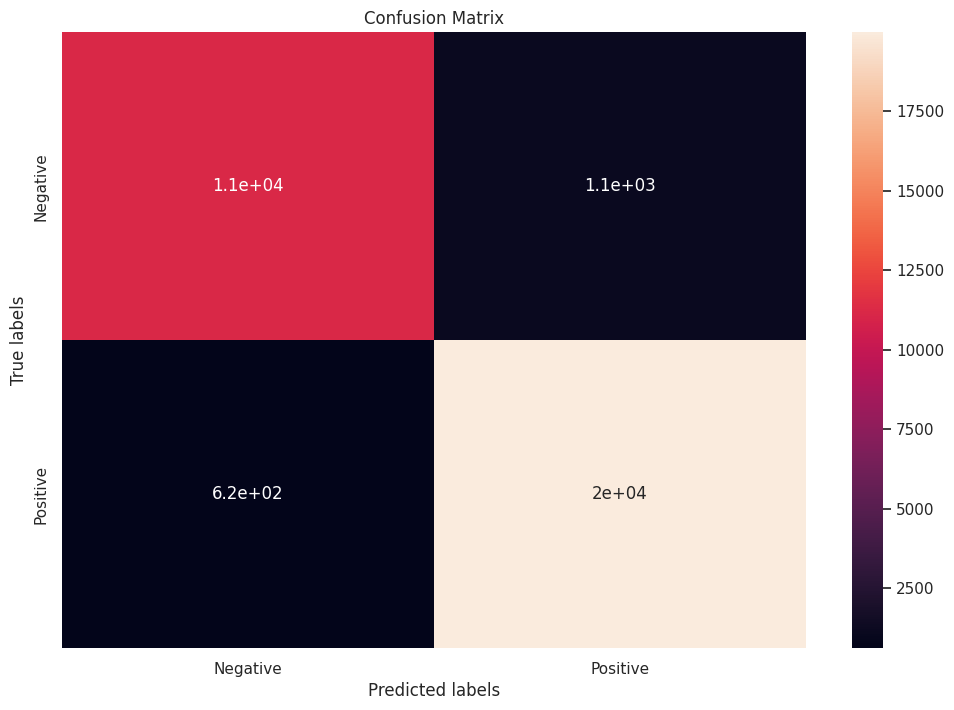

In [ ]:
# Get the confusion matrix for both train and test. We are getting very low 1 type and type 2 errors.

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


In [ ]:
# Let's check the overall accuracy. Overall accuracy is very good.
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = sgd_clf.predict(X_valid)

score =accuracy_score(y_valid,y_pred)
print('accuracy is', score)

accuracy is 0.8623663751214772


In [ ]:
# F1 score for our classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

y_pred =  sgd_clf.predict(X_valid)
print(f1_score(y_valid,y_pred, average="macro"))

0.8503463291643758


In [ ]:
#score is mean accuracy
scikit_score = sgd_clf.score(X_valid,y_valid)
print('scikit score:', scikit_score)

scikit score: 0.8623663751214772


In [ ]:
# Recall score for our winner model
recall_score(y_valid, y_pred, average='macro')

0.844536984754376

In [ ]:
# Classification Report for our stochastic gradient descent algorithm

print(classification_report(sgd_prediction,y_valid))


              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2819
           1       0.92      0.87      0.89      5413

    accuracy                           0.86      8232
   macro avg       0.84      0.86      0.85      8232
weighted avg       0.87      0.86      0.86      8232



In [ ]:
# Very low type 1 and type 2 error
confusion_matrix(y_valid,y_pred)

array([[2383,  697],
       [ 436, 4716]])

# EVALUATION OF ALL BINARY CLASSIFICATION MODELS

**All the model test accuracy by descending order**

In [ ]:
models_binary = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent', ' Gradient Decent Boost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy,
              rf_accuracy, NB_accuracy,
              sgd_accuracy, gdb_accuracy,catboost_accuracy]})

models_binary.sort_values(by='Test accuracy', ascending=False)

Model  Test accuracy
4  Stochastic Gradient Decent       0.862366
1         Logistic Regression       0.862002
6                    CatBoost       0.845603
0     Support Vector Machines       0.834427
2               Random Forest       0.829203
3                 Naive Bayes       0.794096
5       Gradient Decent Boost       0.740282

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

- Accuracy is the most commonly used evaluation metric for classification models.
It is the proportion of correct predictions made by the model.
However, accuracy alone can be misleading, as it does not take into account the class imbalance.
In cases where the classes are imbalanced, accuracy can be high even if the model performs poorly on the minority class.

- To address this, we can use other evaluation metrics such as precision, recall, and F1 score.
Precision is the proportion of predicted positive instances that are actually positive,
while recall is the proportion of actual positive instances that are predicted positive.
F1 score is a weighted average of precision and recall.

- These metrics provide a more comprehensive evaluation of the model's performance, taking into account both accuracy and class imbalance.
By considering these metrics, we can make better decisions about which model to use for a particular task.

- In addition to these metrics, we can also consider the ROC curve and AUC score.
The ROC curve is a plot of the true positive rate (TPR) versus the false positive rate (FPR) at different decision thresholds.
The AUC score is the area under the ROC curve.
The higher the AUC score, the better the model is at distinguishing between positive and negative instances.

- These metrics provide a more complete picture of the model's performance and
 can be used to make informed decisions about which model to use for a particular task.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

The CatBoost outperformed the other models in terms of accuracy, precision, recall, and f1-score for Multi Classification.

Therefore, I would choose CatBoost as my final prediction model.

 The Stochastic Gradient Descent (SGD) Classifier outperformed the other models in terms of accuracy, precision, recall, and f1-score Binary Classification.

Therefore, I would choose SGD as my final prediction model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

For multiclass classification, the best model for this dataset would be CatBoost

For binary classification, the best model for this dataset would be Stochastic Gradient Descent.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***